# <b>Part 0 </b>: Why import Pandas? 


- Because its <i>free</i>
- Because its <i>fast</i>
- Because its easy to <i>read, mantain and extend</i>
- Because you can fly <i>[helicopters on mars](https://www.digiconasia.net/features/running-ingenuity-over-the-surface-of-mars-on-open-source)!

![img.jpg](https://th.bing.com/th/id/OIP.kONsCVQtSc7gLtR13OavOwHaIZ?pid=ImgDet&rs=1)

In [1]:
import numpy as np
import pandas as pd

In [2]:
print('numpy version : ', np.__version__)
print('pandas version : ', pd.__version__)

numpy version :  1.22.2
pandas version :  1.4.1


# <b>Part 1</b> : CRUD with <i>pandas</i>

#### <i>Contents:</i>
> 1.1 Create  
> 1.2 Update  
> 1.3 Save  
> 1.4 Read  
> 1.5 Delete  


###  <b>1.1 Creating data </b> : The `pandas.DataFrame()` constructor 


- It must be called on a recognised data format, and will return an object of <i>type</i> `DataFrame`  
- A `DataFrame` is a data structure optimized to store, query and manipulate relational data in python.

In [3]:
data = {
                'name':           [     'Niloy', 'Jan-Willem', 'Froukje',      'Michelle', 'Arnaut',    'Japke'   ],
                'age' :           [       28,        49,         32,             36,       75 ,         41       ],
                'city':           [    'Tilburg', 'Eindhoven', 'Eindhoven', 'Amsterdam',  'Venlo',    'Nijmegen' ],
                'favourite food': [     'Ramen', 'Rengdang', 'Stamppot',    'Tosti',  'Coque-au-Vin', 'Pizza'    ]
        }

##### We start by creating a dataframe using a `dictionary`.   

- The keys of this dictionary are of <i>type</i>  `string`,  and its values are of <i>type</i> `list`.  

- The keys represent column names, and their corresponding list show values taken by each observation.


In [4]:
people_df = pd.DataFrame(data)

In [5]:
people_df

,name,age,city,favourite food
0,Niloy,28,Tilburg,Ramen
1,Jan-Willem,49,Eindhoven,Rengdang
2,Froukje,32,Eindhoven,Stamppot
3,Michelle,36,Amsterdam,Tosti
4,Arnaut,75,Venlo,Coque-au-Vin
5,Japke,41,Nijmegen,Pizza


The `.shape` attribute allows you to check the shape of a dataframe

In [6]:
people_df.shape

(6, 4)

A DataFrame object in pandas uses <b>three</b> underlining data structures. 

- `pandas.DataFrame`   :   represents the dataframe as a whole
- `pandas.Series`      :   represents labeled one dimensional arrays supporting data of any type.
- `numpy.array`        :   plain, unlabelled arrays, can be one or multi-dimensional

In [7]:
type(people_df), type(people_df.name), type(people_df.name.values)

(pandas.core.frame.DataFrame, pandas.core.series.Series, numpy.ndarray)

All DataFrames in pandas have <b>three</b> main attributes, used to reference the underlining data. 

These are:
-  `index`
- `columns`
- `values`


In [8]:
people_df.columns

Index(['name', 'age', 'city', 'favourite food'], dtype='object')

In [9]:
people_df.index

RangeIndex(start=0, stop=6, step=1)

- The `.head()` method allows you to see the first <i>n</i> observations of the dataframe. If left empty, it defaults to the first 5 observations.

In [10]:
people_df.head()

,name,age,city,favourite food
0,Niloy,28,Tilburg,Ramen
1,Jan-Willem,49,Eindhoven,Rengdang
2,Froukje,32,Eindhoven,Stamppot
3,Michelle,36,Amsterdam,Tosti
4,Arnaut,75,Venlo,Coque-au-Vin


- Similarly, the `.tail()` method allows you to see last <i>n</i> observations of the dataframe.

In [11]:
people_df.tail()

,name,age,city,favourite food
1,Jan-Willem,49,Eindhoven,Rengdang
2,Froukje,32,Eindhoven,Stamppot
3,Michelle,36,Amsterdam,Tosti
4,Arnaut,75,Venlo,Coque-au-Vin
5,Japke,41,Nijmegen,Pizza


- The `.sample()` method does exactly what you think

In [12]:
people_df.sample(3)

,name,age,city,favourite food
2,Froukje,32,Eindhoven,Stamppot
5,Japke,41,Nijmegen,Pizza
4,Arnaut,75,Venlo,Coque-au-Vin


- The `.iloc[]` method alows you to view a subset of your DataFrame, using integer indexing for both row and columns.


In [13]:
people_df.iloc[1,1]

49

- You can also slice the DataFrame using `.iloc`. This is done by using two integers, indicating the range of rows and/or columns you want to select.

In [14]:
people_df.iloc[1:4, :4]

,name,age,city,favourite food
1,Jan-Willem,49,Eindhoven,Rengdang
2,Froukje,32,Eindhoven,Stamppot
3,Michelle,36,Amsterdam,Tosti


- The `.set_index()` method allows you to reset the default integer indexing. You can reset the index using any column in the dataframe, but beware of duplicate values!

In [15]:
indexed_people = people_df.set_index('name')
indexed_people

,age,city,favourite food
name,,,
Niloy,28,Tilburg,Ramen
Jan-Willem,49,Eindhoven,Rengdang
Froukje,32,Eindhoven,Stamppot
Michelle,36,Amsterdam,Tosti
Arnaut,75,Venlo,Coque-au-Vin
Japke,41,Nijmegen,Pizza


- Another way to select a subset of your datais by using the `.loc[]` method. It can be used on named index & columns, as shown below.

In [16]:
indexed_people.loc['Jan-Willem', 'city']

'Eindhoven'

##### In the next section, we will create a `DataFrame` from an existing <i>numpy</i> `array`

- `np.array` is one of the core data structures used in pandas 
- Due to this, `numpy` and `pandas` share many methods for manipulating relational data
- Difference is that numpy arrays dont have fancy indexing, or advanced data selection methods implemented into the data structure itself <i>(as we will see soon)</i>

###  <b>1.2 : Updating data</b> : How to add rows and columns to an existing `DataFrame`?
 


Lets say we want to add two new columns to our dataset above. We will simulate these columns by creating two `numpy arrays`
- <i>1st</i> array contains <b>ZIP codes</b>
- <i>2nd</i> array contains <b>Home values</b>

Lets pretend these are real, and try to assign them as columns to our previous DataFrame.

In [17]:
zip_codes = np.random.randint(5000, 9000, size=6)
home_values = np.random.randint(1, 8, size=6)* 120_000

- First, we combine these two arrays into a bigger, 2-dimensional array

In [18]:
array = np.array([zip_codes, home_values])
array

array([[  8249,   5567,   8658,   8267,   6586,   7946],
       [360000, 720000, 120000, 720000, 600000, 360000]])

- Just like in `pandas`, the `.shape` attribute exists for `numpy arrays` aswell. It is one of many shared attributes and methods between the two libraries

In [19]:
array.shape

(2, 6)

- Next, we pass larger array to a dataframe... but it might not be pretty.

In [20]:
pd.DataFrame(array)

,0,1,2,3,4,5
0,8249,5567,8658,8267,6586,7946
1,360000,720000,120000,720000,600000,360000


For one, the data is in <i>wide</i> format, which is never desirable. Secondly, we do not have any row or column labels.  

Since we know that the first index corresponds to zip codes, and the second to home values, we could try enforcing the indices manually.

This is done by passing a list of desired indices to the `index` keyword argument, when instantiating the DataFrame.

In [21]:
pd.DataFrame(array, index=['zip codes', 'home values'])

,0,1,2,3,4,5
zip codes,8249,5567,8658,8267,6586,7946
home values,360000,720000,120000,720000,600000,360000


That is better, but maybe we want our data in long format, after all our original DataFrame is organised as such.  

- We can transform our data into long format by using the `.transpose()` method, which returns the transpose of the original DataFrame.

In [22]:
pd.DataFrame(array, index=['zip codes', 'home values']).transpose()

,zip codes,home values
0,8249,360000
1,5567,720000
2,8658,120000
3,8267,720000
4,6586,600000
5,7946,360000


- We could have also called transpose method directly on the `numpy array`. This is yet another shared method between both libraries.

In [23]:
pd.DataFrame(array.transpose(), columns=['zip codes', 'home values']) #.T

,zip codes,home values
0,8249,360000
1,5567,720000
2,8658,120000
3,8267,720000
4,6586,600000
5,7946,360000


By the way, we could have also directly passed the `numpy arrays` as values in a dictionary, with keys corresponding to the column names (<i>shown below</i>).  
This is of course easier, but then you woudn't have learnt about transposing your data. I apologise for the detour.

In [24]:
zip_codes = np.random.randint(5000, 9000, size=6)

home_values = np.random.randint(1, 6, size=6) * 140_000

pd.DataFrame({'zip code': zip_codes, 'home_value': home_values})

,zip code,home_value
0,7444,420000
1,8281,700000
2,7992,700000
3,7994,280000
4,5352,560000
5,6427,560000


- Blelow, we combine (or, in pandas lingo, `concatenate`) the original data frame, with our simulated variables (i.e. `zip code` and `home value`)

In [25]:
new_df = pd.DataFrame(array.T, columns=['zip codes', 'home values'])

combined_df = pd.concat([people_df, new_df], axis=1)

combined_df

,name,age,city,favourite food,zip codes,home values
0,Niloy,28,Tilburg,Ramen,8249,360000
1,Jan-Willem,49,Eindhoven,Rengdang,5567,720000
2,Froukje,32,Eindhoven,Stamppot,8658,120000
3,Michelle,36,Amsterdam,Tosti,8267,720000
4,Arnaut,75,Venlo,Coque-au-Vin,6586,600000
5,Japke,41,Nijmegen,Pizza,7946,360000


- Another (arguably better) way to do this is by using the `.assign()` method.

In [26]:
people_df.assign(**new_df)

,name,age,city,favourite food,zip codes,home values
0,Niloy,28,Tilburg,Ramen,8249,360000
1,Jan-Willem,49,Eindhoven,Rengdang,5567,720000
2,Froukje,32,Eindhoven,Stamppot,8658,120000
3,Michelle,36,Amsterdam,Tosti,8267,720000
4,Arnaut,75,Venlo,Coque-au-Vin,6586,600000
5,Japke,41,Nijmegen,Pizza,7946,360000


- Note: the `**` is an unpacking operator for python dictionaries.

In [27]:
[*'abcde']
{**{'a':1, 'b':2}, **{'c':3, 'd':4}}

{'a': 1, 'b': 2, 'c': 3, 'd': 4}

- If we wanted to add rows (instead of columns, like we did above) to our original data, we could again use the `.concat()` method, specifying the axis parameter.

In [28]:

new_rows = {
            'name':            ['Joaquim', 'Jose-Maria'],
            'age':             [   22,          55     ], 
            'city':            [  'Rio',       'Lisboa'],
            'favourite food':  ['Enchiladas',  'Gyoza' ],
            'zip codes':        np.random.randint(6501,9501, size=2),
            'home values' :     np.random.randint(1,9, size=2)*100_000
            }

new_df = pd.DataFrame(new_rows)


more_people_df = pd.concat([combined_df, new_df], axis=0)

more_people_df 

,name,age,city,favourite food,zip codes,home values
0,Niloy,28,Tilburg,Ramen,8249,360000
1,Jan-Willem,49,Eindhoven,Rengdang,5567,720000
2,Froukje,32,Eindhoven,Stamppot,8658,120000
3,Michelle,36,Amsterdam,Tosti,8267,720000
4,Arnaut,75,Venlo,Coque-au-Vin,6586,600000
5,Japke,41,Nijmegen,Pizza,7946,360000
0,Joaquim,22,Rio,Enchiladas,8906,700000
1,Jose-Maria,55,Lisboa,Gyoza,8164,600000


- Here's yet another way to add rows, by calling the `.append()` method on a DataFrame.

In [29]:
new_entry = pd.DataFrame(['Niloy', 29, 'Eindhoven', 'Bibimbap',7000,  300000], index = more_people_df.columns).T

new_entry

,name,age,city,favourite food,zip codes,home values
0,Niloy,29,Eindhoven,Bibimbap,7000,300000


This is an older method, hence the <b>deprecation warning</b> below. 

From time to time, mantainers of the pandas package may change the API, adding new methods ad deprecating old ones, something to look out for.

In [30]:
duplicates_df = more_people_df.append(new_entry)
duplicates_df

C:\Users\npurk\AppData\Local\Temp\ipykernel_48876\2200836256.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duplicates_df = more_people_df.append(new_entry)


,name,age,city,favourite food,zip codes,home values
0,Niloy,28,Tilburg,Ramen,8249,360000
1,Jan-Willem,49,Eindhoven,Rengdang,5567,720000
2,Froukje,32,Eindhoven,Stamppot,8658,120000
3,Michelle,36,Amsterdam,Tosti,8267,720000
4,Arnaut,75,Venlo,Coque-au-Vin,6586,600000
5,Japke,41,Nijmegen,Pizza,7946,360000
0,Joaquim,22,Rio,Enchiladas,8906,700000
1,Jose-Maria,55,Lisboa,Gyoza,8164,600000
0,Niloy,29,Eindhoven,Bibimbap,7000,300000


###  <b>1.3 : Save data to the file system</b> 


- Save the data frame to a desired file format

In [31]:
## sep=';', index=False
df = pd.DataFrame(more_people_df)
df.to_csv('./example.csv')

###  <b>1.4 : Read data</b> : How to load data into pandas ?

- Pandas can both read from and write data to many file formats. These include `.csv`, `.xlsx`,  `json`,  `.parquet`, `sas7bdat`, `.spss`, to name a few.

- Once data is loaded, it is organized using the underlining data structures of pandas.

You can use the top-level method starting with `pd.read_` to load in a data file. Below, we will load in the `.csv` file we saved in the previous exercise

In [32]:
## sep=';', # na values, index_col, 
df = pd.read_csv('./example.csv', index_col=0)
df

,name,age,city,favourite food,zip codes,home values
0,Niloy,28,Tilburg,Ramen,8249,360000
1,Jan-Willem,49,Eindhoven,Rengdang,5567,720000
2,Froukje,32,Eindhoven,Stamppot,8658,120000
3,Michelle,36,Amsterdam,Tosti,8267,720000
4,Arnaut,75,Venlo,Coque-au-Vin,6586,600000
5,Japke,41,Nijmegen,Pizza,7946,360000
0,Joaquim,22,Rio,Enchiladas,8906,700000
1,Jose-Maria,55,Lisboa,Gyoza,8164,600000


Pandas has several types of methods. `Top level methods` like the one above can be invoked using the pandas namespace.  

`DataFrame methods` on the other hand can be called directly on a DataFrame, as shown below.


In [33]:
df.describe( )#include='all'

,age,zip codes,home values
count,8.000000,8.000000,8.000000
mean,42.250000,7792.875000,522500.000000
std,17.069187,1133.425962,219203.102168
min,22.000000,5567.000000,120000.000000
25%,31.000000,7606.000000,360000.000000
50%,38.500000,8206.500000,600000.000000
75%,50.500000,8364.750000,705000.000000
max,75.000000,8906.000000,720000.000000


###  <b>1.5 : Deleting data</b>


In [34]:
df.drop(2)

,name,age,city,favourite food,zip codes,home values
0,Niloy,28,Tilburg,Ramen,8249,360000
1,Jan-Willem,49,Eindhoven,Rengdang,5567,720000
3,Michelle,36,Amsterdam,Tosti,8267,720000
4,Arnaut,75,Venlo,Coque-au-Vin,6586,600000
5,Japke,41,Nijmegen,Pizza,7946,360000
0,Joaquim,22,Rio,Enchiladas,8906,700000
1,Jose-Maria,55,Lisboa,Gyoza,8164,600000


In [35]:
df.drop('age', axis=1)

,name,city,favourite food,zip codes,home values
0,Niloy,Tilburg,Ramen,8249,360000
1,Jan-Willem,Eindhoven,Rengdang,5567,720000
2,Froukje,Eindhoven,Stamppot,8658,120000
3,Michelle,Amsterdam,Tosti,8267,720000
4,Arnaut,Venlo,Coque-au-Vin,6586,600000
5,Japke,Nijmegen,Pizza,7946,360000
0,Joaquim,Rio,Enchiladas,8906,700000
1,Jose-Maria,Lisboa,Gyoza,8164,600000


# <b>Part 2</b> : Data processing and querying

#### <i>Contents:</i>
> 2.1 Pivoting data  
> 2.2 Working with date-time variables  
> 2.3 Boolean Indexing  
> 2.4 Handling missing values

###  <b>2.1 : Pivoting data</b>

The `.melt()` method can be used to pivot a DataFrame from wide to long format, optionally leaving identifiers set.
Other methods like `.pivot()` can be used to achieve similar results.



In [36]:

weeks_in_month = 4
months = ['jun', 'jul', 'aug', 'sept']

In [37]:
rows = []

for month in months:
    feats=[]
    scores = [np.random.randint(1,11) for i in range(weeks_in_month)]
    feats.extend([month])
    feats.extend(scores)
    rows.append(feats)

rows


[['jun', 6, 8, 8, 2],
 ['jul', 5, 6, 1, 9],
 ['aug', 7, 10, 8, 10],
 ['sept', 3, 6, 3, 5]]

In [38]:

weeks = weeks = ['Week_'+str(i) for i in list(range(1,5))]
pd.DataFrame(rows, columns = ['month'] + weeks)


weeks = weeks = ['Week_'+str(i) for i in list(range(1,5))]

pd.DataFrame(rows, columns = ['month'] + weeks).melt(id_vars=['month'])

,month,variable,value
0,jun,Week_1,6
1,jul,Week_1,5
2,aug,Week_1,7
3,sept,Week_1,3
4,jun,Week_2,8
5,jul,Week_2,6
6,aug,Week_2,10
7,sept,Week_2,6
8,jun,Week_3,8
9,jul,Week_3,1


###  <b>2.2: Working with datetime variables</b> 

In [39]:
#pd.date_range('10-10-2022', '20-12-2022', freq='M')

In [40]:

#pd.date_range('10-10-2022', '20-10-2022')
#pd.date_range('10-10-2022', '20-10-2022').day_name()
#pd.date_range('10-10-2022', '20-10-2022').month_name()
#pd.to_datetime('now')

In [41]:
dates = pd.date_range('10-10-2022', '20-10-2022')

prices = np.random.randint(110, 300, size=len(dates))

prices_df = pd.DataFrame([dates, prices], index=['dates', 'prices']).T

prices_df

c:\Users\npurk\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3251: UserWarning: Parsing '20-10-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


,dates,prices
0,2022-10-10,279
1,2022-10-11,200
2,2022-10-12,217
3,2022-10-13,148
4,2022-10-14,140
5,2022-10-15,247
6,2022-10-16,190
7,2022-10-17,205
8,2022-10-18,151
9,2022-10-19,211


In [42]:
prices_df.set_index('dates').loc['2022-10-13':'2022-10-15']

prices_df

,dates,prices
0,2022-10-10,279
1,2022-10-11,200
2,2022-10-12,217
3,2022-10-13,148
4,2022-10-14,140
5,2022-10-15,247
6,2022-10-16,190
7,2022-10-17,205
8,2022-10-18,151
9,2022-10-19,211


In [43]:
prices_df.assign(price_yesterday=prices_df['prices'].shift(1))

,dates,prices,price_yesterday
0,2022-10-10,279,NaN
1,2022-10-11,200,279
2,2022-10-12,217,200
3,2022-10-13,148,217
4,2022-10-14,140,148
5,2022-10-15,247,140
6,2022-10-16,190,247
7,2022-10-17,205,190
8,2022-10-18,151,205
9,2022-10-19,211,151


In [44]:
prices_df.assign(price_tomorrow=prices_df['prices'].shift(-1))

,dates,prices,price_tomorrow
0,2022-10-10,279,200
1,2022-10-11,200,217
2,2022-10-12,217,148
3,2022-10-13,148,140
4,2022-10-14,140,247
5,2022-10-15,247,190
6,2022-10-16,190,205
7,2022-10-17,205,151
8,2022-10-18,151,211
9,2022-10-19,211,265


#### Mini Exercise: 
- assign tomorrow's price as a column by using `.shift(1)`

In [45]:
sorted_dates = prices_df.sort_values(by='dates', ascending=False)
sorted_dates.assign(price_tomorrow = sorted_dates['prices'].shift(1).values)

,dates,prices,price_tomorrow
10,2022-10-20,265,NaN
9,2022-10-19,211,265
8,2022-10-18,151,211
7,2022-10-17,205,151
6,2022-10-16,190,205
5,2022-10-15,247,190
4,2022-10-14,140,247
3,2022-10-13,148,140
2,2022-10-12,217,148
1,2022-10-11,200,217


In [46]:
sorted_dates['prices'].shift(1).array

<PandasArray>
[nan, 265, 211, 151, 205, 190, 247, 140, 148, 217, 200]
Length: 11, dtype: object

In [47]:
# moving average
prices_df.set_index('dates').rolling(3).agg('mean')

,prices
dates,
2022-10-10,NaN
2022-10-11,NaN
2022-10-12,232.000000
2022-10-13,188.333333
2022-10-14,168.333333
2022-10-15,178.333333
2022-10-16,192.333333
2022-10-17,214.000000
2022-10-18,182.000000


###  <b>2.3 : Boolean Indexing : the real power of pandas</b> 

In [48]:
[True for i in range(len(prices_df))]

[True, True, True, True, True, True, True, True, True, True, True]

In [49]:
prices_df[[True for i in range(len(prices_df))]]

,dates,prices
0,2022-10-10,279
1,2022-10-11,200
2,2022-10-12,217
3,2022-10-13,148
4,2022-10-14,140
5,2022-10-15,247
6,2022-10-16,190
7,2022-10-17,205
8,2022-10-18,151
9,2022-10-19,211


In [50]:
cond1 = prices_df['prices']<150
#cond1

#prices_df[cond1]

In [51]:
cond2 = prices_df['dates']>'2022-10-15'
#cond2
#prices_df[cond2]

In [52]:
#cond1 & cond2

In [53]:
prices_df[cond1 & cond2]

,dates,prices


In [54]:
prices_df[cond1 | cond2]

,dates,prices
3,2022-10-13,148
4,2022-10-14,140
6,2022-10-16,190
7,2022-10-17,205
8,2022-10-18,151
9,2022-10-19,211
10,2022-10-20,265


##### Alot of DataFrame methods return boolean indexed arrays
- Boolean indexing refers to arrays with boolean masks for indices that do not match a given condition.

In [55]:
df.head()

,name,age,city,favourite food,zip codes,home values
0,Niloy,28,Tilburg,Ramen,8249,360000
1,Jan-Willem,49,Eindhoven,Rengdang,5567,720000
2,Froukje,32,Eindhoven,Stamppot,8658,120000
3,Michelle,36,Amsterdam,Tosti,8267,720000
4,Arnaut,75,Venlo,Coque-au-Vin,6586,600000


In [56]:

df.city.str.contains('dam')


0    False
1    False
2    False
3     True
4    False
5    False
0    False
1    False
Name: city, dtype: bool

In [57]:
df['favourite food'].str.startswith('R')

0     True
1     True
2    False
3    False
4    False
5    False
0    False
1    False
Name: favourite food, dtype: bool

- `Boolean algebra` refers to computing logical operations, (e.g. `and` , `or` , `not`, etc.) on two or more booleans
- Using <i>boolean algebra</i>, several boolean arrays can be combined to satisfy <b>multiple</b> conditions.
- Using this property of booleans, pandas allows you to efficiently retrieve data given multiple boolean masked arrays.

In [58]:
df[
    (df.city.str.contains('dam'))               # condition one
  |                                             # OR
    (df['favourite food'].str.startswith('R'))  # condition 2
 ]

,name,age,city,favourite food,zip codes,home values
0,Niloy,28,Tilburg,Ramen,8249,360000
1,Jan-Willem,49,Eindhoven,Rengdang,5567,720000
3,Michelle,36,Amsterdam,Tosti,8267,720000


In [59]:
stocks = ['AAPL', 'META', 'NFLX', 'BAIDU', 'MSFT', 'SNAP', 'TSLA', 'INTC', 'AMZN']

prices = np.random.randint(110, 300, size=len(stocks))

stock_df = pd.DataFrame([stocks, prices], index=['ticker', 'prices']).T

stock_df

,ticker,prices
0,AAPL,181
1,META,203
2,NFLX,245
3,BAIDU,187
4,MSFT,120
5,SNAP,185
6,TSLA,129
7,INTC,129
8,AMZN,186


In [60]:
stock_df[(stock_df.ticker=='META') | ((stock_df.ticker=='AAPL'))]

,ticker,prices
0,AAPL,181
1,META,203


In [61]:
on_radar = ['AAPL', 'META', 'NVDA', 'NFLX', 'AMZN']

stock_df[stock_df.ticker.isin(on_radar)]

,ticker,prices
0,AAPL,181
1,META,203
2,NFLX,245
8,AMZN,186


### Mini exercise :
- Assign a column named `yesterday_price`, with values as random integers between 110 and 280
- Select stocks on your radar that decreased in price since yesterday



In [62]:
stock_df = stock_df.assign(yesterday_price = np.random.randint(110, 280, size=len(stock_df)))

stock_df[(stock_df.yesterday_price > stock_df.prices) & (stock_df.ticker.isin(on_radar)) ]

,ticker,prices,yesterday_price
0,AAPL,181,257
8,AMZN,186,215


###  <b>2.1 : Handeling Missing values</b> 

In [63]:
df

,name,age,city,favourite food,zip codes,home values
0,Niloy,28,Tilburg,Ramen,8249,360000
1,Jan-Willem,49,Eindhoven,Rengdang,5567,720000
2,Froukje,32,Eindhoven,Stamppot,8658,120000
3,Michelle,36,Amsterdam,Tosti,8267,720000
4,Arnaut,75,Venlo,Coque-au-Vin,6586,600000
5,Japke,41,Nijmegen,Pizza,7946,360000
0,Joaquim,22,Rio,Enchiladas,8906,700000
1,Jose-Maria,55,Lisboa,Gyoza,8164,600000


In [64]:
df.loc[2, 'city'] = np.nan
df

,name,age,city,favourite food,zip codes,home values
0,Niloy,28,Tilburg,Ramen,8249,360000
1,Jan-Willem,49,Eindhoven,Rengdang,5567,720000
2,Froukje,32,NaN,Stamppot,8658,120000
3,Michelle,36,Amsterdam,Tosti,8267,720000
4,Arnaut,75,Venlo,Coque-au-Vin,6586,600000
5,Japke,41,Nijmegen,Pizza,7946,360000
0,Joaquim,22,Rio,Enchiladas,8906,700000
1,Jose-Maria,55,Lisboa,Gyoza,8164,600000


In [65]:
df.isna().sum(axis=0)

name              0
age               0
city              1
favourite food    0
zip codes         0
home values       0
dtype: int64

In [66]:
df.city.value_counts()#dropna=False

Tilburg      1
Eindhoven    1
Amsterdam    1
Venlo        1
Nijmegen     1
Rio          1
Lisboa       1
Name: city, dtype: int64

#### Mini Exercise:
- Calculate `%` of missing values by column

In [67]:
df.isna().mean()*100

name               0.0
age                0.0
city              12.5
favourite food     0.0
zip codes          0.0
home values        0.0
dtype: float64

In [68]:
df.dropna()

,name,age,city,favourite food,zip codes,home values
0,Niloy,28,Tilburg,Ramen,8249,360000
1,Jan-Willem,49,Eindhoven,Rengdang,5567,720000
3,Michelle,36,Amsterdam,Tosti,8267,720000
4,Arnaut,75,Venlo,Coque-au-Vin,6586,600000
5,Japke,41,Nijmegen,Pizza,7946,360000
0,Joaquim,22,Rio,Enchiladas,8906,700000
1,Jose-Maria,55,Lisboa,Gyoza,8164,600000


In [69]:
df.dropna(axis=1)

,name,age,favourite food,zip codes,home values
0,Niloy,28,Ramen,8249,360000
1,Jan-Willem,49,Rengdang,5567,720000
2,Froukje,32,Stamppot,8658,120000
3,Michelle,36,Tosti,8267,720000
4,Arnaut,75,Coque-au-Vin,6586,600000
5,Japke,41,Pizza,7946,360000
0,Joaquim,22,Enchiladas,8906,700000
1,Jose-Maria,55,Gyoza,8164,600000


In [70]:
df.dropna(axis=1, inplace=False)

,name,age,favourite food,zip codes,home values
0,Niloy,28,Ramen,8249,360000
1,Jan-Willem,49,Rengdang,5567,720000
2,Froukje,32,Stamppot,8658,120000
3,Michelle,36,Tosti,8267,720000
4,Arnaut,75,Coque-au-Vin,6586,600000
5,Japke,41,Pizza,7946,360000
0,Joaquim,22,Enchiladas,8906,700000
1,Jose-Maria,55,Gyoza,8164,600000


In [71]:
df.iloc[-1, -1] = np.nan

df

,name,age,city,favourite food,zip codes,home values
0,Niloy,28,Tilburg,Ramen,8249,360000.0
1,Jan-Willem,49,Eindhoven,Rengdang,5567,720000.0
2,Froukje,32,NaN,Stamppot,8658,120000.0
3,Michelle,36,Amsterdam,Tosti,8267,720000.0
4,Arnaut,75,Venlo,Coque-au-Vin,6586,600000.0
5,Japke,41,Nijmegen,Pizza,7946,360000.0
0,Joaquim,22,Rio,Enchiladas,8906,700000.0
1,Jose-Maria,55,Lisboa,Gyoza,8164,NaN


In [72]:
df['home values'].fillna(df['home values'].mean(), inplace=True)

df

,name,age,city,favourite food,zip codes,home values
0,Niloy,28,Tilburg,Ramen,8249,360000.000000
1,Jan-Willem,49,Eindhoven,Rengdang,5567,720000.000000
2,Froukje,32,NaN,Stamppot,8658,120000.000000
3,Michelle,36,Amsterdam,Tosti,8267,720000.000000
4,Arnaut,75,Venlo,Coque-au-Vin,6586,600000.000000
5,Japke,41,Nijmegen,Pizza,7946,360000.000000
0,Joaquim,22,Rio,Enchiladas,8906,700000.000000
1,Jose-Maria,55,Lisboa,Gyoza,8164,511428.571429


In [73]:
df.iloc[-1, 2] = 'Eindhoven'

df

,name,age,city,favourite food,zip codes,home values
0,Niloy,28,Tilburg,Ramen,8249,360000.000000
1,Jan-Willem,49,Eindhoven,Rengdang,5567,720000.000000
2,Froukje,32,NaN,Stamppot,8658,120000.000000
3,Michelle,36,Amsterdam,Tosti,8267,720000.000000
4,Arnaut,75,Venlo,Coque-au-Vin,6586,600000.000000
5,Japke,41,Nijmegen,Pizza,7946,360000.000000
0,Joaquim,22,Rio,Enchiladas,8906,700000.000000
1,Jose-Maria,55,Eindhoven,Gyoza,8164,511428.571429


In [74]:
df.city.mode()

0    Eindhoven
Name: city, dtype: object

In [75]:
df['city'].fillna(df.city.mode().values[0])

0      Tilburg
1    Eindhoven
2    Eindhoven
3    Amsterdam
4        Venlo
5     Nijmegen
0          Rio
1    Eindhoven
Name: city, dtype: object

In [76]:
## note about na values in pandas (read_csv)

df.iloc[1,2] = ''

df

,name,age,city,favourite food,zip codes,home values
0,Niloy,28,Tilburg,Ramen,8249,360000.000000
1,Jan-Willem,49,,Rengdang,5567,720000.000000
2,Froukje,32,NaN,Stamppot,8658,120000.000000
3,Michelle,36,Amsterdam,Tosti,8267,720000.000000
4,Arnaut,75,Venlo,Coque-au-Vin,6586,600000.000000
5,Japke,41,Nijmegen,Pizza,7946,360000.000000
0,Joaquim,22,Rio,Enchiladas,8906,700000.000000
1,Jose-Maria,55,Eindhoven,Gyoza,8164,511428.571429


In [77]:
(df
.isna()
.sum())

name              0
age               0
city              1
favourite food    0
zip codes         0
home values       0
dtype: int64

In [78]:
(df
.replace({'':np.nan})
.isna()
.sum())

name              0
age               0
city              2
favourite food    0
zip codes         0
home values       0
dtype: int64

In [79]:

#from sklearn.impute import KNNImputer

# <b>Part 3</b> : Working with real data

## 3.1 Exploring customer claims

#### <i>Contents:</i>
> 3.11 Digging deeper into pandas data types   
> 3.12 Creating date-time features  
> 3.13 Imputing column values  
> 3.14 Chaning operations  

In [80]:
dpath='C:/Users/npurk/Documents/Interpolis/data/RWD/'
file_name = "20220811_CLAIMS_SAMPLE"
claims = pd.read_csv(f'{dpath+file_name}.csv', sep=';', encoding="ISO-8859-1", low_memory=False)
print(claims.shape)
claims.head()

(194898, 36)


,DTSMUT,SCM,RBRCLM,STSRDN,SDEGBS,CLMTYP,SCMTYP,SDEOZK,GVODOS,SDEK,...,CLMSTS_T,SCMTYP_T,RBRCLM_T,TOTSDELTN,NETSDELTN,UKDBDR,Polisnummer_hash,polis_id,claim_id,PC4
0,07JUN2021:04:02:27.0860000,1,ZC,ZA,ZG05,ZC01,ZC10,X60,NaN,CP,...,Gesloten,Bez. Buitenshuis Doorl.,Reis/Tijdelijke Reis&BDD,136.50,136.50,136.50,FE90B03B36DFB9CA6493941BF17DF3D0EA4B649BDE03B2...,130828,1,7419
1,07JUN2021:04:02:27.0860000,1,ZD,ZA,ZD01,ZD01,ZD01,Y32,NaN,PH,...,Gesloten,AVP Materieel,Aansprakelijkheid,450.00,450.00,450.00,61CACB9EE9086AB21C81C2B20E23E5817CDCA84C68A7D4...,50161,2,6371
2,07JUN2021:04:02:27.0860000,1,NaN,ZA,ZA01,ZAT1,ZA01,Z23,NaN,PH,...,Gesloten,Aanrijding,NaN,626.91,626.91,626.91,396B1B78B6DA8829C16A6527B89626A604FBB3538FBB71...,29326,3,5801
3,07JUN2021:04:02:27.0860000,1,ZC,ZK,ZG05,ZC01,ZC10,X59,NaN,PH,...,Gesloten,Bez. Buitenshuis Doorl.,Reis/Tijdelijke Reis&BDD,0.00,0.00,0.00,A8B0BD1967723A6732281C365E8603C38680D76DCA433B...,86663,4,5737
4,07JUN2021:04:02:27.0860000,1,ZB,ZA,ZB01,ZB01,ZB01,Z68,NaN,PH,...,Gesloten,Woonhuis Standaard,Wonen / Brand,463.35,463.35,463.35,B55EAB5B7948C52D47C6169CA8A49343890C7AED3CEB4A...,93279,5,8921


###  <b>3.11 : Digging deeper into dtypes</b>

In [81]:
claims.dtypes

DTSMUT               object
SCM                   int64
RBRCLM               object
STSRDN               object
SDEGBS               object
CLMTYP               object
SCMTYP               object
SDEOZK               object
GVODOS              float64
SDEK                 object
LNDVZN               object
WNADRIND            float64
CORADRIND           float64
BSPRD                object
CLMSTS               object
LSLSDE              float64
MAK                  object
VAL                  object
STSDTS               object
SDEDTS               object
REGDTS               object
ATLSDEOBJ             int64
SDEOZK_T             object
CLMTYP_T             object
STSRDN_T             object
SDEGBS_T             object
CLMSTS_T             object
SCMTYP_T             object
RBRCLM_T             object
TOTSDELTN           float64
NETSDELTN           float64
UKDBDR              float64
Polisnummer_hash     object
polis_id              int64
claim_id              int64
PC4                 

In [82]:
claims.dtypes.value_counts()

object     25
float64     7
int64       4
dtype: int64

The `object` data type is used by pandas pandas if the data cannot represent as a number, (e.g. strings, mixed type data)
- These variables actually point to live python objects (not super fast) 

In [83]:
claims.select_dtypes('object').columns

Index(['DTSMUT', 'RBRCLM', 'STSRDN', 'SDEGBS', 'CLMTYP', 'SCMTYP', 'SDEOZK',
       'SDEK', 'LNDVZN', 'BSPRD', 'CLMSTS', 'MAK', 'VAL', 'STSDTS', 'SDEDTS',
       'REGDTS', 'SDEOZK_T', 'CLMTYP_T', 'STSRDN_T', 'SDEGBS_T', 'CLMSTS_T',
       'SCMTYP_T', 'RBRCLM_T', 'Polisnummer_hash', 'PC4'],
      dtype='object')

- The <i>`count`</i> statistic returned by `.describe()` indicates the number of of non NA values, for a given feature  

In [84]:
claims.select_dtypes('object').describe()

,DTSMUT,RBRCLM,STSRDN,SDEGBS,CLMTYP,SCMTYP,SDEOZK,SDEK,LNDVZN,BSPRD,...,REGDTS,SDEOZK_T,CLMTYP_T,STSRDN_T,SDEGBS_T,CLMSTS_T,SCMTYP_T,RBRCLM_T,Polisnummer_hash,PC4
count,194898,144810,173970,194898,194898,194898,194898,183576,194745,133335,...,194898,194898,194898,173970,194898,194898,194898,144810,194898,194087
unique,1,5,11,48,5,34,183,14,14,16,...,1942,179,6,11,40,4,31,5,66294,3762
top,07JUN2021:04:02:27.0860000,ZB,ZA,ZB09,ZB01,ZB05,Z17,PH,NL,Autoverzekering,...,18JAN2018:12:00:00.0000000,Overig,Household,Afgehandeld,Van buiten komende onheilen,Gesloten,Inboedel Plus,Wonen / Brand,278590F41029CF6AF05CE6EB1B0A0F59751FCD6BCF968C...,5571
freq,194898,87476,144569,37905,87476,32775,37860,137154,194643,43054,...,959,37860,87476,144569,37938,190542,32775,87476,40,494


In [85]:
claims.select_dtypes('object').memory_usage(deep=True).sum()

332323320

In [86]:
claims.select_dtypes('object').astype('category').memory_usage(deep=True).sum()

36064430


- Pandas will automatically convert columns with missing values to float, and represent missing instances as `np.nan`

In [87]:
claims.describe(include=['float64'])#include='all'

,GVODOS,WNADRIND,CORADRIND,LSLSDE,TOTSDELTN,NETSDELTN,UKDBDR
count,0.0,194745.000000,194745.000000,0.0,194898.000000,194898.000000,194898.000000
mean,NaN,0.560625,0.999394,NaN,731.537939,664.316797,706.903715
std,NaN,0.496312,0.024608,NaN,3333.847468,3304.838435,3169.813358
min,NaN,0.000000,0.000000,NaN,-2964.000000,-59005.570000,-2964.000000
25%,NaN,0.000000,1.000000,NaN,15.000000,0.000000,0.000000
50%,NaN,1.000000,1.000000,NaN,221.495000,178.200000,201.445000
75%,NaN,1.000000,1.000000,NaN,745.080000,641.710000,710.290000
max,NaN,1.000000,1.000000,NaN,589579.480000,589579.480000,589579.480000



- The `int` data types by default cannot store NA values, so features with those data types will have no missing values


In [88]:
claims.select_dtypes('int').memory_usage(deep=True)

Index            128
SCM          1559184
ATLSDEOBJ    1559184
polis_id     1559184
claim_id     1559184
dtype: int64

<b>NOTE:</b> When working with very large datasets, it can be useful to look at memory allocation 
- Allocating less memory per column lets you load in more data into memory : i.e. more data to analyse
- Each feature has ranges, and some do not need to be represented by a 64-bit integer (i.e. `np.int64`), when an 8-bit integer will suffice

In [89]:
claims.select_dtypes('int').memory_usage(deep=True).sum()

6236864

In [90]:
np.iinfo(np.int8)

iinfo(min=-128, max=127, dtype=int8)

In [91]:
claims[['SCM'	,'ATLSDEOBJ']].describe()

,SCM,ATLSDEOBJ
count,194898.000000,194898.000000
mean,1.129309,0.882692
std,0.367480,0.338343
min,1.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,16.000000,7.000000


In [92]:
claims[['SCM'	,'ATLSDEOBJ']].dtypes.memory_usage(deep=True)

334

In [93]:
claims[['SCM'	,'ATLSDEOBJ']].astype('int8').dtypes.memory_usage()

32

- `Python` may be slow, but `Pandas` is fast. It leverages next-to-C level performance gains by using numpy (which itself is written in C).

-  An example of this is how each column in the dataframe is represented as a distinct data type (instead of interpreting types on the fly, as python does). 

- `Pandas` will allocate a block of memory in RAM for each of these columns, and use [vectorization](https://medium.com/analytics-vidhya/understanding-vectorization-in-numpy-and-pandas-188b6ebc5398) where possible.

- Hence, when you want to manipulate data residing in these columns, `Pandas` can leverage modern CPU architectures (SIMD instruction set) to do so efficiently and with speed.


###  <b>3.12 : Creating date-time features</b>

In [94]:
df = claims.sample(10000)
df.head()

,DTSMUT,SCM,RBRCLM,STSRDN,SDEGBS,CLMTYP,SCMTYP,SDEOZK,GVODOS,SDEK,...,CLMSTS_T,SCMTYP_T,RBRCLM_T,TOTSDELTN,NETSDELTN,UKDBDR,Polisnummer_hash,polis_id,claim_id,PC4
108669,07JUN2021:04:02:27.0860000,1,ZAT,ZA,ZA03,ZAT1,ZA02,Z16,NaN,PH,...,Gesloten,Ruit,Verkeer,526.60,526.60,526.60,E3B6CE0F7AF45E72C465299661759AF29311E1D9876A38...,116939,101692,3958
59202,07JUN2021:04:02:27.0860000,1,ZB,ZA,ZB09,ZB01,ZB05,X60,NaN,PH,...,Gesloten,Inboedel Plus,Wonen / Brand,211.63,211.63,211.63,0C6CE7A8D877797B5F5BB6D3D1F855CD8E0A81434A77DE...,6240,55480,5213
67024,07JUN2021:04:02:27.0860000,1,ZAT,ZA,ZA09,ZAT1,ZA01,Z34,NaN,PH,...,Gesloten,Aanrijding,Verkeer,773.00,0.00,773.00,BAEE854AE8B38BAD2FDAB6E7953E890A67F373B9A92E48...,96145,62827,4456
181687,07JUN2021:04:02:27.0860000,1,ZB,ZA,ZB09,ZB01,ZB05,Z17,NaN,PH,...,Gesloten,Inboedel Plus,Wonen / Brand,124.06,124.06,124.06,1D310BF68DFAA7789AC69FE304D238E65AD16F61AC2243...,14850,170052,8262
44927,07JUN2021:04:02:27.0860000,1,ZC,ZA,ZC04,ZC01,ZC01,Z57,NaN,PH,...,Gesloten,Reis Personenhulp,Reis/Tijdelijke Reis&BDD,1101.95,1101.95,1101.95,EBC6253A991A4B19F32EBDC1B6C553D9A4D667D6CD7F6C...,121132,42109,5094


In [95]:
df.filter(regex='DTS').head()

,DTSMUT,STSDTS,SDEDTS,REGDTS
108669,07JUN2021:04:02:27.0860000,19DEC2016:11:36:54.0000000,05DEC2016:12:00:00.0000000,05DEC2016:12:00:00.0000000
59202,07JUN2021:04:02:27.0860000,22MAY2019:12:56:58.0000000,01MAY2019:12:00:00.0000000,03MAY2019:12:00:00.0000000
67024,07JUN2021:04:02:27.0860000,18MAY2018:17:42:39.0000000,12APR2017:12:00:00.0000000,12APR2017:12:00:00.0000000
181687,07JUN2021:04:02:27.0860000,16NOV2018:14:49:31.0000000,17OCT2018:12:00:00.0000000,17OCT2018:12:00:00.0000000
44927,07JUN2021:04:02:27.0860000,21JUN2017:17:43:44.0000000,13MAY2017:12:00:00.0000000,18MAY2017:12:00:00.0000000


Taking a deep copy of the original dataframe ensures that any changes we make on the copied data are not applied to the original data 

 - NOTE: See difference between shallow and deep copy [here](https://www.geeksforgeeks.org/difference-between-shallow-copy-vs-deep-copy-in-pandas-dataframes/)

In [96]:
processed_df = df.copy(deep=True)

- The `to_datetime()` method is quite versatile. Usually it can infer datetime formats on the go,  
and parse them down to nanoseconds if available.   

However, it may sometimes fail...

In [97]:
#pd.to_datetime(processed_df['SDEDTS'])

#### Here are two different ways of solving the issue. 

#### <b>Method : 1</b>
 Apply an element-wise lambda function to the entire series, using python's inbuilt `.split()` method. 

 <b>Steps:</b>

1. Select the pandas series `SDEDTS`  

2. Apply a `lambda function` on each element in the series:   

<b>This `lambda function` will: </b>
> a) Split the string element using the delimiter <i>`":"`</i>    
> b) Select the first string in the resulting list of splitted strings  
> c) Call `pd.to_datetime()` on this first string   

In [98]:
processed_df.SDEDTS.apply(lambda x: pd.to_datetime(x.split(":")[0]))

108669   2016-12-05
59202    2019-05-01
67024    2017-04-12
181687   2018-10-17
44927    2017-05-13
            ...    
73693    2021-02-15
187155   2017-01-27
53031    2016-09-10
106016   2016-12-19
177597   2017-08-20
Name: SDEDTS, Length: 10000, dtype: datetime64[ns]

#### <b>Method : 2</b>
Use the `.str` accessor on the pandas series, then the pandas `.split()` method built for `.str` accessor. It has an additional parameter that returns a column for each split of the original string.

In [99]:
processed_df.SDEDTS.str.split(':', expand=True)

,0,1,2,3
108669,05DEC2016,12,00,00.0000000
59202,01MAY2019,12,00,00.0000000
67024,12APR2017,12,00,00.0000000
181687,17OCT2018,12,00,00.0000000
44927,13MAY2017,12,00,00.0000000
...,...,...,...,...
73693,15FEB2021,12,00,00.0000000
187155,27JAN2017,12,00,00.0000000
53031,10SEP2016,12,00,00.0000000
106016,19DEC2016,12,00,00.0000000


We can slice the resulting dataframe using the `.iloc[]` method to pull out the first column, which contains the date infromation we want.

In [100]:
pd.to_datetime(processed_df.SDEDTS.str.split(':', expand=True).iloc[:,0])

108669   2016-12-05
59202    2019-05-01
67024    2017-04-12
181687   2018-10-17
44927    2017-05-13
            ...    
73693    2021-02-15
187155   2017-01-27
53031    2016-09-10
106016   2016-12-19
177597   2017-08-20
Name: 0, Length: 10000, dtype: datetime64[ns]

In [101]:
## .split(expand=True) is not a python method for strings!

##'dsf dfvf'.split(' ', expand=True)

- As opposed to the first method, this method can take advantage of modern CPU instruction sets to deliver the same functionality in less than half the time.


In [102]:
%timeit processed_df.SDEDTS.apply(lambda x: pd.to_datetime(x.split(':')[0]))

1.91 s ± 54.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [103]:
%timeit pd.to_datetime(processed_df.SDEDTS.str.split(':', expand=True).iloc[:,0])

841 ms ± 34 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Wherever possible,  try avoid using `.apply()`.  

Since it operates element-wise, it converts pandas data types into live python objects, before performing operations.  

In case your performing operations on numeric types, [`df.where()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html) and [`np.select()`](https://numpy.org/doc/stable/reference/generated/numpy.select.html) are better alternatives than the [`.apply()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) method.

<b>Note</b>: <i>It still beats python's native `for loop`.


In [104]:
processed_df['SDEDTS'] = pd.to_datetime(processed_df.SDEDTS.str.split(':', expand=True).iloc[:,0])

In [105]:
processed_df = processed_df.assign(year = lambda x: x.SDEDTS.dt.year)

In [106]:
processed_df[['SDEDTS', 'year']].sample(5)

,SDEDTS,year
142784,2016-12-03,2016
27441,2017-02-23,2017
131348,2017-08-03,2017
97315,2021-02-09,2021
151413,2016-10-05,2016


In [107]:
processed_df.groupby('year')['claim_id'].count() #.plot.bar()

year
2013       1
2014       2
2015      30
2016    1458
2017    2135
2018    2188
2019    1870
2020    1630
2021     686
Name: claim_id, dtype: int64


###  <b>3.13 : Imputing column values</b>

- Sometimes, your data may exist in a coded format, with keys residing in another file. 

- This is essentially as if your data was in another language, and you had to translate the variables into something you can understand.

In [108]:
import column_trans

In [109]:
column_trans.claims_columns[claims.columns.get_loc('SDEDTS')]

'occurance_date'

In [110]:
claims.columns[column_trans.claims_columns.index('occurance_date')]

'SDEDTS'

In [111]:
claims.columns = column_trans.claims_columns

In [112]:
to_trans = ['cause_damage_d', 'type_damage_d', 'insured_category', 'insurance_product_d']
claims_sample = claims[to_trans].sample(10)
claims_sample

,cause_damage_d,type_damage_d,insured_category,insurance_product_d
180385,Annulering,Andere oorzaak,Doorlopende Reisverzekering,Reis Annulering
58351,Ruitbreuk / Lekkage,Breuk,Opstalverzekering,Glas
109526,Water/neerslagschade/lekkage,Overig,NaN,Inboedel Standaard
84886,Aanrijding met tegenpartij,Artikel 54 RVV bijzondere verrichting,NaN,Aanrijding
63893,Ruitbreuk,Steenslag,Autoverzekering,Ruit
123398,Ruitbreuk,Steenslag,Autoverzekering,Ruit
181062,Inbraak,Inbraak,Autoverzekering,Inbraak
73137,Diefstal /Verlies,Verlies,NaN,Bagage
63724,Van buiten komende onheilen,Overig,Opstalverzekering,Woonhuis Plus
38821,Van buiten komende onheilen,Overig,Inboedelverzekering,Inboedel Plus


In [113]:
for col_name in to_trans:
    replace_dict = getattr(column_trans, col_name)
    claims_sample[col_name] = claims_sample[col_name].replace(replace_dict)
    
claims_sample[to_trans]

,cause_damage_d,type_damage_d,insured_category,insurance_product_d
180385,Cancellation,Other cause,Continuous Travel Insurance,Travel Cancellation
58351,Window break / Leakage,Fracture,Home insurance,Glass
109526,Water/precipitation damage/leakage,Other,NaN,Standard furniture
84886,Collision with an opponent,Article 54 RVV special transaction,NaN,Collision
63893,Window break,Cracked stone,Car insurance,Glass
123398,Window break,Cracked stone,Car insurance,Glass
181062,Burglar,burglary,Car insurance,Burglary
73137,Theft/Loss,Loss,NaN,Luggage
63724,Casualities coming from outside,Other,Home insurance,Residential Plus
38821,Casualities coming from outside,Other,Household insurance,Household contents Plus



###  <b>3.14 : Chaning operations</b>

Our brains can only handle a limited amount of information at a time. `Chaning` , also known as <i>flow programming</i>, helps organise our code so it reads like a recipie.  

Instead of making several intermediate variables along the way, we can leverage the fact that most pandas methods return a new DataFrame object, and continue working on these new objects.


In [114]:
def to_datetime(df, date_col):
    df[date_col] = df[date_col].apply(lambda x : x.split(':')[0])\
                               .apply(lambda x : pd.to_datetime(x))
    return df

In [115]:
def translate_columns(df, to_replace):
    df.columns = column_trans.claims_columns
    for col_name in to_replace:
        replace_dict = getattr(column_trans, col_name)
        df[col_name] = df[col_name].replace(replace_dict)
    return df

-  `.pipe()` is a powerful method that allows you to chain multiple operations together, each operating on the output of the previous call.

In [116]:
df = (claims.copy(deep=True)
            .pipe(to_datetime, 'occurance_date')
            .pipe(translate_columns, to_trans))

### <b> 3.15:  Exercises</b>

#### Exercise 1:
- Claim value by month (bonus: plot with month names)

<AxesSubplot:xlabel='name'>

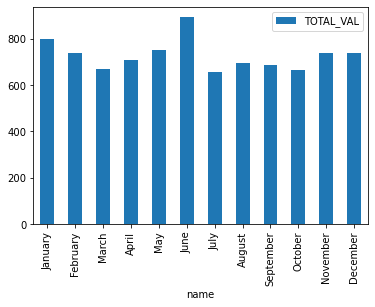

In [117]:
(df
.assign(month = df.occurance_date.dt.month)
.assign(name = df.occurance_date.dt.month_name())
.groupby('month')
.agg({'TOTAL_VAL':'mean',
      'name': lambda x:x.sample(1)})
 .plot.bar(x='name', y='TOTAL_VAL'))

#### Exercise 2:
- Average claim value by insured category (bonus: plot horizontal bar chart)


<AxesSubplot:ylabel='insured_category'>

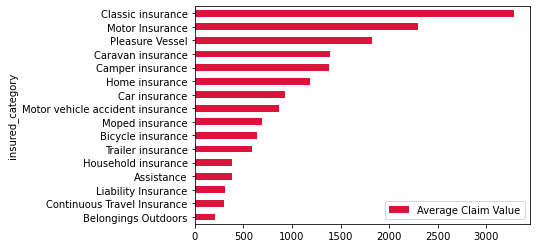

In [118]:
(df
.groupby('insured_category')
.agg({'TOTAL_VAL':'mean'})
.sort_values(by='TOTAL_VAL')
.rename({'TOTAL_VAL':'Average Claim Value'}, axis=1)
.plot.barh(color='CRIMSON'))

#### Exercise 3:
- Top 5 types of damages in years <i>2020, 2021</i> and <i>2022.


In [119]:
year = 2019

damage_year = df[df.occurance_date.dt.year==year]

counts_per_damage = damage_year.type_damage_d.value_counts().sort_values(ascending=False)

counts_per_damage[:5]

Other                                 5550
Fall and impact damage                5061
Cracked stone                         2594
Parking damage                        2573
Article 54 RVV special transaction    2250
Name: type_damage_d, dtype: int64

#### Exercise 4:
- Pull out causes of damage that comprise more than <b> 10% </b>of all claims

In [120]:
year = 2019

damage_year = df[df.occurance_date.dt.year==year]

counts_per_damage = damage_year.type_damage_d.value_counts()

proportions = counts_per_damage/counts_per_damage.sum()

proportions[proportions>.1]

Other                     0.148503
Fall and impact damage    0.135419
Name: type_damage_d, dtype: float64

#### Exercise 5:
- Which insured category has the highest number of sub-claims per claim

<AxesSubplot:ylabel='insured_category'>

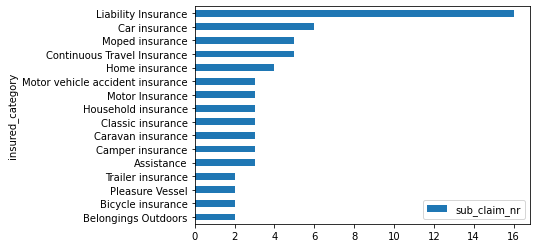

In [121]:
(df
.groupby('insured_category')
.agg({'sub_claim_nr': 'max'})
.sort_values(by='sub_claim_nr')
.plot.barh())

#### Exercise 6:
- Top 5 Zipcodes with highest claim values

In [122]:
postal_group = (df
                .groupby('PC4')
                .agg({'TOTAL_VAL':'mean'}))

postal_group.sort_values(by='TOTAL_VAL',ascending=False).head()

,TOTAL_VAL
PC4,
3626,114331.930000
8522,20258.957500
9343,12877.478750
9233,11072.922778
4905,9372.602500


#### Exercise 6:
- Top 5 postal codes where average claim value is below the 50th percentile


In [123]:
quantile_val =np.quantile(postal_group.TOTAL_VAL, q = [.5])[0]

severe_claims = (postal_group
.query(f'TOTAL_VAL<{quantile_val}')
.sort_values(by='TOTAL_VAL', ascending=False)
.head(5))

severe_claims

,TOTAL_VAL
PC4,
4261,612.047818
5658,612.021039
4731,611.666882
7038,611.401216
4824,611.069710


#### Exercise 7:
In these postal areas, <b><i> per each insurance product</b></i>, calculate:

- The number of claims  
- Average claim value  
- Sum of claim values  
- Causes of damages  
   


In [124]:


severe_claims_df = (df
                        [df.PC4.isin(severe_claims.index)]

                        .groupby(['PC4', 'insurance_product_d'])

                        .agg({'claim_id':'count',
                              'TOTAL_VAL':['mean', 'sum'],
                              'cause_damage_d':lambda x:set(x.sample(5, replace=True))})


                        .rename({'claim_id':'claims',
                              'TOTAL_VAL':'Value',
                              'cause_damage_d':'causes'}, axis=1)

                        .sort_values(by=['PC4', ('Value', 'sum')], ascending=False)
)

severe_claims_df.round(1)

claims   Value           \
                                 count    mean      sum   
PC4  insurance_product_d                                  
7038 Collision                      21  1229.9  25827.0   
     Residential House Standard      9   751.6   6764.2   
     WA Equipment                   10   666.9   6668.9   
     Glass                           8   281.9   2255.3   
     Household contents Plus         9   156.4   1407.4   
...                                ...     ...      ...   
4261 Luggage                         5   251.9   1259.3   
     Standard furniture              4   301.5   1205.9   
     Bez. Travel Cancellation        5   241.1   1205.7   
     Vandalism                       1   790.9    790.9   
     Residential Plus                1   200.0    200.0   

                                                                            causes  
                                                                          <lambda>  
PC4  insurance_product_d                                                            
7038 Collision                   {Single-vehicle accident, Collision with an op...  
     Residential House Standard  {Fire, Water/precipitation damage/leakage, Win...  
     WA Equipment                                     {Collision with an opponent}  
     Glass                                  {Window break / Leakage, Window break}  
     Household contents Plus                     {Casualities coming from outside}  
...                                                                            ...  
4261 Luggage                                                  {Theft/Loss, Damage}  
     Standard furniture          {Storm Nature, Fire, Water/precipitation damag...  
     Bez. Travel Cancellation                        {Damage not while travelling}  
     Vandalism                                                         {Vandalism}  
     Residential Plus                            {Casualities coming from outside}  

[73 rows x 4 columns]

## 3.2 Exploring Policies
#### <i>Contents:</i>
> 3.21 Common complaints  
> 3.22 Column selection with conditional regex     

#### Exercise Concepts covered:
> <i>1</i> : Finding latest entries (of a policy holder)  
> <i>2</i> : Averages & Group averages  
> <i>3</i> : Finding nth value in groups  
> <i>4</i> : Calculating percentage change over periods  
> <i>5</i> : Conditional look-ups with multiple datasets  
> <i>6</i> : Multi-Indexed DataFrames 

In [125]:
file_name = "20220811_POLICY_SAMPLE"
policies = pd.read_csv(f'{dpath+file_name}.csv',
                        sep=';',
                        encoding="ISO-8859-1",
                        low_memory=True)

C:\Users\npurk\AppData\Local\Temp\ipykernel_48876\2689346256.py:2: DtypeWarning: Columns (89) have mixed types. Specify dtype option on import or set low_memory=False.
  policies = pd.read_csv(f'{dpath+file_name}.csv',


In [126]:
policies.shape

(358405, 90)

#### <b>3.21</b>: A common complaint : 
><i>`I always save a .csv file after data preprocessing.  
>However, when I load the file next time, I have to convert dtypes again and it will take a long time. `

In [127]:
import pickle

dtype_dict = policies.dtypes.to_dict()

with open('./policy_dtypes.pkl', 'wb') as f:
    pickle.dump(dtype_dict, f)

    
## talk about pickle and serialization

In [128]:
with open('./policy_dtypes.pkl', 'rb') as f:
    dtype_dict = pickle.load(f)

# you can also save to json


- To improve memory management, several options allow loading data faster, often by either specifying dtypes for columns, or loading a subset of rows/columns at a time.

In [129]:
policies = pd.read_csv(f'{dpath+file_name}.csv', sep=';', encoding="ISO-8859-1",dtype=dtype_dict) 

In [130]:
policies.to_pickle('your_data.pkl')
policies = pd.read_pickle('your_data.pkl')
policies.head()

,begindatum,einddatum,peildatum,peildatum_volgnummer,peildatum_ingevoerd,gezinssamenstelling,distributiekanaal,leeftijd_polishouder,verkoopdatum_polis,ingangsdatum_polis,...,loyaliteitskorting_jaarbedrag,preventiekorting_jaarbedrag,assurantiebel_jaarbedrag,preventiekorting_indicatie,rubriek_onbekend_premie,rubriekkorting_percentage,polisstatus_berek_peildatum,Polisnummer_hash,polis_id,postcode4
0,01JAN2021,31DEC9999,01JAN2021,3,01JAN2021,Tweepersoons huishouden,2,51.0,NaN,12APR2001,...,0.0,0.0,2.74,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851
1,01JAN1999,01JAN2020,01JAN2019,1,01JAN2019,Tweepersoons huishouden,2,49.0,NaN,12APR2001,...,0.0,0.0,1.77,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851
2,01JAN2020,01JAN2021,01JAN2020,2,01JAN2020,Tweepersoons huishouden,2,50.0,NaN,12APR2001,...,0.0,0.0,1.77,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851
3,01JAN2020,01JAN2021,01JAN2020,2,01JAN2020,Eenpersoons huishouden,2,65.0,NaN,24FEB1997,...,0.0,0.0,199.89,0,NaN,9,1,0000942B3DC5E9AEDBACCA3B0357D98DC0A4F583F93BBF...,2,4451
4,01JAN1999,01JAN2020,01JAN2019,1,01JAN2019,Eenpersoons huishouden,2,64.0,NaN,24FEB1997,...,0.0,0.0,175.58,0,NaN,9,1,0000942B3DC5E9AEDBACCA3B0357D98DC0A4F583F93BBF...,2,4451


#### <b>3.22</b> : Selecting columns by variable types

In [131]:
policies.filter(regex='datum').head()
#pd datetime

,begindatum,einddatum,peildatum,peildatum_volgnummer,peildatum_ingevoerd,verkoopdatum_polis,ingangsdatum_polis,eerstvolgende_prolongatiedatum,polisstatus_berek_peildatum
0,01JAN2021,31DEC9999,01JAN2021,3,01JAN2021,NaN,12APR2001,12APR2021,1
1,01JAN1999,01JAN2020,01JAN2019,1,01JAN2019,NaN,12APR2001,12APR2019,1
2,01JAN2020,01JAN2021,01JAN2020,2,01JAN2020,NaN,12APR2001,12APR2020,1
3,01JAN2020,01JAN2021,01JAN2020,2,01JAN2020,NaN,24FEB1997,26APR2020,1
4,01JAN1999,01JAN2020,01JAN2019,1,01JAN2019,NaN,24FEB1997,26APR2019,1


In [132]:

dates = policies.filter(regex='datum').replace({'31DEC9999':'31DEC2022'})
dates.head()

,begindatum,einddatum,peildatum,peildatum_volgnummer,peildatum_ingevoerd,verkoopdatum_polis,ingangsdatum_polis,eerstvolgende_prolongatiedatum,polisstatus_berek_peildatum
0,01JAN2021,31DEC2022,01JAN2021,3,01JAN2021,NaN,12APR2001,12APR2021,1
1,01JAN1999,01JAN2020,01JAN2019,1,01JAN2019,NaN,12APR2001,12APR2019,1
2,01JAN2020,01JAN2021,01JAN2020,2,01JAN2020,NaN,12APR2001,12APR2020,1
3,01JAN2020,01JAN2021,01JAN2020,2,01JAN2020,NaN,24FEB1997,26APR2020,1
4,01JAN1999,01JAN2020,01JAN2019,1,01JAN2019,NaN,24FEB1997,26APR2019,1


In [133]:
dates.sample(500)\
     .drop(['peildatum_volgnummer', 'polisstatus_berek_peildatum'], axis=1)\
     .apply(pd.to_datetime)

,begindatum,einddatum,peildatum,peildatum_ingevoerd,verkoopdatum_polis,ingangsdatum_polis,eerstvolgende_prolongatiedatum
187668,2021-01-01,2022-12-31,2021-01-01,2021-01-01,NaT,1997-10-13,2021-10-04
178458,1999-01-01,2020-01-01,2019-01-01,2019-01-01,2017-07-20,2017-07-21,2019-07-21
27572,2020-01-01,2021-01-01,2020-01-01,2020-01-01,NaT,2005-07-28,2020-07-28
78294,1999-01-01,2020-01-01,2019-01-01,2019-01-01,NaT,2008-09-29,2019-09-29
114511,2020-01-01,2021-01-01,2020-01-01,2020-01-01,2017-12-07,2017-12-22,2020-12-22
...,...,...,...,...,...,...,...
138550,1999-01-01,2020-01-01,2019-01-01,2019-01-01,2018-01-15,2018-01-15,2019-01-15
68578,1999-01-01,2020-01-01,2019-01-01,2019-01-01,NaT,2005-09-01,2019-04-01
90470,1999-01-01,2020-01-01,2019-01-01,2019-01-01,NaT,2004-06-03,2019-06-03
273640,1999-01-01,2020-01-01,2019-01-01,2019-01-01,NaT,1997-05-19,2019-02-18


In [134]:
#  errors= raise ->breaks execution,
#  coherce-> NaT,
#  ignore-> original input

In [135]:
policies = (policies
                   .assign(**policies
                                    .filter(regex='begin|eind')
                                    .replace({'31DEC9999':'31DEC2022'})
                                    .apply(pd.to_datetime)
                           )
           )

policies.head()

,begindatum,einddatum,peildatum,peildatum_volgnummer,peildatum_ingevoerd,gezinssamenstelling,distributiekanaal,leeftijd_polishouder,verkoopdatum_polis,ingangsdatum_polis,...,loyaliteitskorting_jaarbedrag,preventiekorting_jaarbedrag,assurantiebel_jaarbedrag,preventiekorting_indicatie,rubriek_onbekend_premie,rubriekkorting_percentage,polisstatus_berek_peildatum,Polisnummer_hash,polis_id,postcode4
0,2021-01-01,2022-12-31,01JAN2021,3,01JAN2021,Tweepersoons huishouden,2,51.0,NaN,12APR2001,...,0.0,0.0,2.74,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851
1,1999-01-01,2020-01-01,01JAN2019,1,01JAN2019,Tweepersoons huishouden,2,49.0,NaN,12APR2001,...,0.0,0.0,1.77,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851
2,2020-01-01,2021-01-01,01JAN2020,2,01JAN2020,Tweepersoons huishouden,2,50.0,NaN,12APR2001,...,0.0,0.0,1.77,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851
3,2020-01-01,2021-01-01,01JAN2020,2,01JAN2020,Eenpersoons huishouden,2,65.0,NaN,24FEB1997,...,0.0,0.0,199.89,0,NaN,9,1,0000942B3DC5E9AEDBACCA3B0357D98DC0A4F583F93BBF...,2,4451
4,1999-01-01,2020-01-01,01JAN2019,1,01JAN2019,Eenpersoons huishouden,2,64.0,NaN,24FEB1997,...,0.0,0.0,175.58,0,NaN,9,1,0000942B3DC5E9AEDBACCA3B0357D98DC0A4F583F93BBF...,2,4451


<b>NOTE:</b> If you already know which column names correspond to datetime objects, you can specify them in your `pd.read_csv()` call, but if errors occur while parsing dates, the corresponding column will not be transformed to the appropriate datetime format (e.g. `einddatum`)

In [136]:
policies = pd.read_csv(f'{dpath+file_name}.csv', sep=';', encoding="ISO-8859-1", low_memory=True, parse_dates=['begindatum'	,'einddatum',	'peildatum']) 
policies.sample(3)

C:\Users\npurk\AppData\Local\Temp\ipykernel_48876\3799604453.py:1: DtypeWarning: Columns (89) have mixed types. Specify dtype option on import or set low_memory=False.
  policies = pd.read_csv(f'{dpath+file_name}.csv', sep=';', encoding="ISO-8859-1", low_memory=True, parse_dates=['begindatum'	,'einddatum',	'peildatum'])


,begindatum,einddatum,peildatum,peildatum_volgnummer,peildatum_ingevoerd,gezinssamenstelling,distributiekanaal,leeftijd_polishouder,verkoopdatum_polis,ingangsdatum_polis,...,loyaliteitskorting_jaarbedrag,preventiekorting_jaarbedrag,assurantiebel_jaarbedrag,preventiekorting_indicatie,rubriek_onbekend_premie,rubriekkorting_percentage,polisstatus_berek_peildatum,Polisnummer_hash,polis_id,postcode4
107049,2021-01-01,31DEC9999,2021-01-01,3,01JAN2021,Eenpersoons huishouden,2,80.0,NaN,24JUN2012,...,0.0,0.0,41.76,0,NaN,6,1,4CDE92E4D362EFEEAB10EC7B18E43A13A316C9CD04D9FD...,39292,3401
236493,2020-01-01,01JAN2021,2020-01-01,2,01JAN2020,Tweepersoons huishouden,2,72.0,NaN,28AUG2002,...,0.0,0.0,263.88,0,NaN,12,1,A9145855064E9A6647C3695C118D06EF0EEEF0A6EB3E8C...,86866,6412
340999,2020-01-01,01JAN2021,2020-01-01,2,01JAN2020,Tweepersoons huishouden,2,71.0,NaN,29SEP1997,...,0.0,0.0,80.40,0,NaN,6,1,F37FAD0C496BCAF708893C18FE3A4E696EA30A0CDBE94B...,125195,5615


### <b>3.23: </b> Exercises</b>

#### Exercise 1: 
- Find the latest policy entry associated to each policy holder

In [137]:
a = policies.sort_values(by='peildatum_volgnummer', ascending=False).drop_duplicates('polis_id')

a.head()

,begindatum,einddatum,peildatum,peildatum_volgnummer,peildatum_ingevoerd,gezinssamenstelling,distributiekanaal,leeftijd_polishouder,verkoopdatum_polis,ingangsdatum_polis,...,loyaliteitskorting_jaarbedrag,preventiekorting_jaarbedrag,assurantiebel_jaarbedrag,preventiekorting_indicatie,rubriek_onbekend_premie,rubriekkorting_percentage,polisstatus_berek_peildatum,Polisnummer_hash,polis_id,postcode4
0,2021-01-01,31DEC9999,2021-01-01,3,01JAN2021,Tweepersoons huishouden,2,51.0,NaN,12APR2001,...,0.0,0.0,2.74,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851.0
107270,2021-01-01,31DEC9999,2021-01-01,3,01JAN2021,Eenpersoons huishouden,2,34.0,NaN,11OCT2013,...,0.0,0.0,8.16,0,NaN,0,1,4D05E533F32D637FDDC217C0C5913D1E92FC1B5FAEE6FF...,39375,1852
250785,2021-01-01,31DEC9999,2021-01-01,3,01JAN2021,Meerpersoons huishouden,2,67.0,NaN,28APR1997,...,0.0,0.0,284.16,0,NaN,12,1,B328699E767FD3A43021304FF4B159437213A903756AB4...,92107,6181
107263,2021-01-01,31DEC9999,2021-01-01,3,01JAN2021,Meerpersoons huishouden,2,37.0,NaN,22FEB2005,...,0.0,0.0,216.60,0,NaN,12,1,4D049D4580414D1D5AEE8782326C3C92141A1CA65F3326...,39372,6591
107265,2021-01-01,31DEC9999,2021-01-01,3,01JAN2021,Eenpersoons huishouden,2,29.0,06NOV2020,06NOV2020,...,0.0,0.0,24.96,0,NaN,0,1,4D04AD8BCBDCD543954ADA6A3236CA50CCFC06C10928C4...,39373,2496


In [138]:
bool_idx = policies.groupby('polis_id')['peildatum_volgnummer'].transform(max) == policies.peildatum_volgnummer

b = policies[bool_idx]

b.head()

,begindatum,einddatum,peildatum,peildatum_volgnummer,peildatum_ingevoerd,gezinssamenstelling,distributiekanaal,leeftijd_polishouder,verkoopdatum_polis,ingangsdatum_polis,...,loyaliteitskorting_jaarbedrag,preventiekorting_jaarbedrag,assurantiebel_jaarbedrag,preventiekorting_indicatie,rubriek_onbekend_premie,rubriekkorting_percentage,polisstatus_berek_peildatum,Polisnummer_hash,polis_id,postcode4
0,2021-01-01,31DEC9999,2021-01-01,3,01JAN2021,Tweepersoons huishouden,2,51.0,NaN,12APR2001,...,0.0,0.0,2.74,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851.0
5,2021-01-01,31DEC9999,2021-01-01,3,01JAN2021,Eenpersoons huishouden,2,66.0,NaN,24FEB1997,...,0.0,0.0,201.36,0,NaN,9,1,0000942B3DC5E9AEDBACCA3B0357D98DC0A4F583F93BBF...,2,4451.0
6,2021-01-01,31DEC9999,2021-01-01,3,01JAN2021,Meerpersoons huishouden,2,33.0,NaN,18JUL2012,...,0.0,0.0,99.12,0,NaN,3,1,0002099890AAAEB6800A989F2D5BA885139A01183C6E5F...,3,7141.0
11,2021-01-01,31DEC9999,2021-01-01,3,01JAN2021,Tweepersoons huishouden,2,27.0,03SEP2018,01OCT2018,...,0.0,0.0,161.40,0,NaN,9,1,0002CA64E7AA454C527471421DE0AF4DDA2A29D69C8D5B...,4,6824.0
12,2020-01-01,01JAN2021,2020-01-01,2,01JAN2020,Onbekend,2,21.0,20DEC2019,20DEC2019,...,0.0,0.0,318.36,0,NaN,0,1,000518B81904D1E3567C7E850D5DAAF705D62706637E24...,5,3201.0


In [139]:
b.equals(a)

False

In [140]:
b.sort_index().equals(a.sort_index())

True

- Both are valid ways to achieve this, however one is faster

In [141]:
%timeit policies.sort_values(by='peildatum_volgnummer', ascending=False).drop_duplicates('polis_id')

283 ms ± 9.02 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


- As we can see, we may take less time per loop, but we are actually doing more loops than the previous example

In [142]:
%timeit policies[policies.groupby('polis_id')['peildatum_volgnummer'].transform(max) == policies.peildatum_volgnummer]

80.1 ms ± 2.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Exercise 2: 
- Calculate the average premium paid by policy holders (total and per category)

In [143]:
policies.filter(regex=f'premie').mean()#.sort_values(ascending=False).plot.bar()

rubriek_personen_premie             56.300715
rubriek_recreatie_premie           120.136929
rubriek_verkeer_premie             609.754359
rubriek_wonen_premie               282.569563
rubriek_rechtsbijstand_premie      128.505021
jaarpremie_voor_belasting_polis    673.477173
jaarpremie_verzekeraar             557.363518
jaarpremie_inclusief_belasting     807.203669
jaarpremie_na_korting              603.696079
rubriek_onbekend_premie                   NaN
dtype: float64

#### Exercise 3: 
- Find the premium paid by policy holders in the previous renewal period.

In [144]:

premium_var = 'jaarpremie_verzekeraar'

premium_group =(policies
                        .sort_values('peildatum_volgnummer', ascending=True)
                        .groupby('polis_id')[premium_var]
                        )

In [145]:
previous_premium = premium_group.nth(-2)

previous_premium.head()

polis_id
1     75.36
2    778.92
3    391.68
4    613.56
6    208.44
Name: jaarpremie_verzekeraar, dtype: float64

#### Exercise 4: 
- Find the `%` change in premium since the previous renewal period, for each policy holder

In [146]:
premium_var = 'jaarpremie_verzekeraar'

premium_group =(policies
                        .sort_values('peildatum_volgnummer', ascending=True)
                        .groupby('polis_id')[premium_var]
                        )

In [147]:
previous_premium = premium_group.nth(-2)

current_premium = premium_group.nth(-1)

In [148]:
premium_change = pd.merge(previous_premium, current_premium, left_index=True, right_index=True)\
    .rename({premium_var+'_x':'premium_prev',
        premium_var+'_y':'premium_cur'}, axis=1)

premium_change.head()

,premium_prev,premium_cur
polis_id,,
1,75.36,75.36
2,778.92,783.77
3,391.68,389.52
4,613.56,629.64
6,208.44,191.76


In [149]:
(premium_change
.dropna()
.assign(percent_change =lambda x: ( (x['premium_cur'] -x['premium_prev'] ) / x['premium_prev'] )*100))



,premium_prev,premium_cur,percent_change
polis_id,,,
1,75.36,75.36,0.000000
2,778.92,783.77,0.622657
3,391.68,389.52,-0.551471
4,613.56,629.64,2.620771
6,208.44,191.76,-8.002303
...,...,...,...
131581,677.04,685.08,1.187522
131582,841.20,755.28,-10.213980
131583,226.08,116.88,-48.301486


In [150]:
### verify manually
policies[policies.polis_id==2][[premium_var, 'peildatum_volgnummer']]


,jaarpremie_verzekeraar,peildatum_volgnummer
3,778.92,2
4,690.15,1
5,783.77,3


#### Exercise 5: 
- Find the year of construction of a policy-holder's residence for:
1. All policy holders living in zipcodes where severe claims have occured.
2. Who have  made `Water/precipitation damage/leakage` related claims

In [151]:
severe_claims

,TOTAL_VAL
PC4,
4261,612.047818
5658,612.021039
4731,611.666882
7038,611.401216
4824,611.069710


In [152]:
file_name = "20220811_CONTRACT_SAMPLE"
contracts = pd.read_csv(f'{dpath+file_name}.csv', sep=';', encoding="ISO-8859-1", low_memory=True)
contracts.head()

C:\Users\npurk\AppData\Local\Temp\ipykernel_48876\2367632689.py:2: DtypeWarning: Columns (24,41,108,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  contracts = pd.read_csv(f'{dpath+file_name}.csv', sep=';', encoding="ISO-8859-1", low_memory=True)


,begindatum,einddatum,peildatum,peildatum_volgnummer,con_klantpremie_jaarbedrag,basisproduct,propositieproduct,object_omschrijving,subobject_omschrijving,rubriek,...,Massa bedrijfsklaar minimaal,Massa bedrijfsklaar maximaal,Technisch toelaatbaar massa kopp,Maximum massa technisch maximaal,Maximum massa technisch minimaal,Subcategorie Nederland,Verticale belasting koppelpunt g,Zuinigheidsclassificatie,Registratie datum goedkeuri_0001,postcode4
0,01JAN1999,01JAN2020,01JAN2019,1,39.84,SK1T10000A0000,Rechtsbijstand,Persoon,Persoon,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9468.0
1,01JAN1999,01JAN2020,01JAN2019,1,253.80,SKYTL0000A0000,Woonhuis,Gebouwen,Woonhuis,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9468.0
2,01JAN1999,01JAN2020,01JAN2019,1,50.76,SK5U30000A0000,Caravan,Voertuig,Caravan,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9468.0
3,01JAN1999,01JAN2020,01JAN2019,1,142.32,SKQRU0000A0000,Doorlopende Reis,Persoon,Persoon,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9468.0
4,01JAN1999,01JAN2020,01JAN2019,1,134.64,SKYVL0000A0000,Inboedel,Gebouwen,Inboedel,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9468.0


In [153]:
claims[claims.cause_damage_d=='Water/neerslagschade/lekkage']

,DATE_INIT,sub_claim_nr,claim_metatype,reason_closed,cause_damage,claim_type,insurance_product,type_damage,NA_ND1,contact_channel,...,claim_status_description,insurance_product_d,claim_metatype_d,TOTAL_VAL,NET_PAID,INTERNAL_VAL,policy_hash,polis_id,claim_id,PC4
7,07JUN2021:04:02:27.0860000,2,ZB,ZA,ZB07,ZB01,ZB04,Z87,NaN,PH,...,Gesloten,Inboedel Standaard,Wonen / Brand,239.00,239.00,239.00,DA8F54DD21DA1C13F5B080028DCE49F0360317B5587A0E...,112292,8,3241
8,07JUN2021:04:02:27.0860000,1,ZB,ZA,ZB07,ZB01,ZB01,Z87,NaN,PH,...,Gesloten,Woonhuis Standaard,Wonen / Brand,1053.07,1053.07,1053.07,DA8F54DD21DA1C13F5B080028DCE49F0360317B5587A0E...,112292,8,3241
13,07JUN2021:04:02:27.0860000,1,ZB,ZA,ZB07,ZB01,ZB01,Z17,NaN,PH,...,Gesloten,Woonhuis Standaard,Wonen / Brand,626.57,626.57,626.57,B93055BBCEB3A2A45D5F820AEA68B43CB6365AB03A4B20...,95277,12,5246
45,07JUN2021:04:02:27.0860000,1,ZB,ZA,ZB07,ZB01,ZB04,Z17,NaN,CP,...,Gesloten,Inboedel Standaard,Wonen / Brand,0.00,0.00,0.00,8A3678FBD26C0368738014D531E31E1F1A56AE0E3CFF99...,71047,43,2645
46,07JUN2021:04:02:27.0860000,2,ZB,ZA,ZB07,ZB01,ZB05,Z17,NaN,CP,...,Gesloten,Inboedel Plus,Wonen / Brand,1900.14,1900.14,1900.14,8A3678FBD26C0368738014D531E31E1F1A56AE0E3CFF99...,71047,43,2645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194868,07JUN2021:04:02:27.0860000,2,ZB,ZA,ZB07,ZB01,ZB01,Z54,NaN,NaN,...,Gesloten,Woonhuis Standaard,Wonen / Brand,13753.89,13753.89,13753.89,E356D359CAA4934488C93B517B78EE288C8CAA4DA75E7E...,116745,182344,5037
194869,07JUN2021:04:02:27.0860000,1,ZB,ZA,ZB07,ZB01,ZB02,Z54,NaN,NaN,...,Gesloten,Woonhuis Plus,Wonen / Brand,0.00,0.00,0.00,E356D359CAA4934488C93B517B78EE288C8CAA4DA75E7E...,116745,182344,5037
194872,07JUN2021:04:02:27.0860000,1,ZB,ZA,ZB07,ZB01,ZB01,Z87,NaN,PH,...,Gesloten,Woonhuis Standaard,Wonen / Brand,1721.66,1721.66,1721.66,3829D0AADE61EF19AECD120101F64304A79FFCA18156FF...,28666,182348,2641
194874,07JUN2021:04:02:27.0860000,1,ZB,ZA,ZB07,ZB01,ZB01,Z62,NaN,PH,...,Gesloten,Woonhuis Standaard,Wonen / Brand,503.01,503.01,503.01,FACF25642B3DE93A3D07C35AEF67DF0538F8FCD17A6755...,128878,182350,6043


<AxesSubplot:ylabel='Frequency'>

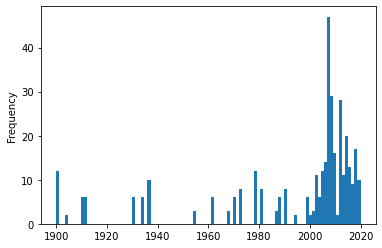

In [154]:
# find policies of people living in some postal codes
policyholders_severe_postal = policies[policies['postcode4'].isin(severe_claims.index)]

# check if their policy id is in the claims dataset
made_claims_cond = claims.polis_id.isin(policyholders_severe_postal.polis_id)

# check which claims have water damage cause
water_damage_cond = claims.cause_damage_d=='Water/neerslagschade/lekkage'

# pull out corresponding claims
their_claims = claims[made_claims_cond & water_damage_cond]

# check which contracts they have
their_contracts_cond = contracts.Polisnummer_hash.isin(their_claims.policy_hash)

# pull out the construction year from the contracts dataset
contracts[their_contracts_cond]['bouwjaar'].dropna().plot.hist(bins=100)

#### Exercise 6: 
  
- Find all policies that changed their address
- Include entries corresponding to last and current address 

In [155]:
# find number of unique postals per policy holder
n_unique_zips = policies.groupby('polis_id')['postcode4'].nunique()

# pull out the index (i.e. policy id) of entries with more than one unique postal code
have_several_postal_codes = n_unique_zips[n_unique_zips>1].index

# check which policy ids match these entries
policies_with_multiple_zips = policies.polis_id.isin(have_several_postal_codes)

# select these policies and drop duplicated entries of postal codes (sorted for visualization)
(policies
[policies_with_multiple_zips]
.drop_duplicates('postcode4')
.sort_values(by='polis_id', ascending=True)
[['peildatum', 'polis_id', 'postcode4']]
)


,peildatum,polis_id,postcode4
32,2021-01-01,13,1095.0
33,2020-01-01,13,1075.0
72,2021-01-01,27,7731.0
73,2019-01-01,27,8011.0
84,2021-01-01,31,4374.0
...,...,...,...
357439,2021-01-01,131236,8334
357708,2020-01-01,131334,4861
357992,2019-01-01,131435,6261
357996,2021-01-01,131437,1135


In [156]:
policies[policies.polis_id==131437 ][['peildatum', 'postcode4', 'polis_id']]

,peildatum,postcode4,polis_id
357995,2020-01-01,1095,131437
357996,2021-01-01,1135,131437



#### Trick 1: OHE and reverse OHE in pandas



In [157]:
ohe_df = pd.get_dummies(people_df, columns=['city'])
ohe_df

,name,age,favourite food,city_Amsterdam,city_Eindhoven,city_Nijmegen,city_Tilburg,city_Venlo
0,Niloy,28,Ramen,0,0,0,1,0
1,Jan-Willem,49,Rengdang,0,1,0,0,0
2,Froukje,32,Stamppot,0,1,0,0,0
3,Michelle,36,Tosti,1,0,0,0,0
4,Arnaut,75,Coque-au-Vin,0,0,0,0,1
5,Japke,41,Pizza,0,0,1,0,0


In [158]:
filter_cols = list(ohe_df.filter(regex='city_').columns)

filter_cols

['city_Amsterdam',
 'city_Eindhoven',
 'city_Nijmegen',
 'city_Tilburg',
 'city_Venlo']

In [159]:
reverse_ohe = ohe_df[filter_cols].idxmax(axis=1).str.replace('city_', '')

reverse_ohe

# add back to original data

0      Tilburg
1    Eindhoven
2    Eindhoven
3    Amsterdam
4        Venlo
5     Nijmegen
dtype: object

#### Trick 2: Corellation and covariance between categorical variables

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
c_df = contracts[['propositieproduct',	'object_omschrijving',	'subobject_omschrijving', 'con_klantpremie_jaarbedrag']]
c_df

,propositieproduct,object_omschrijving,subobject_omschrijving,con_klantpremie_jaarbedrag
0,Rechtsbijstand,Persoon,Persoon,39.84
1,Woonhuis,Gebouwen,Woonhuis,253.80
2,Caravan,Voertuig,Caravan,50.76
3,Doorlopende Reis,Persoon,Persoon,142.32
4,Inboedel,Gebouwen,Inboedel,134.64
...,...,...,...,...
1653164,Inboedel,Gebouwen,Inboedel,95.04
1653165,Inboedel,Gebouwen,Inboedel,49.32
1653166,Aansprakelijkheid,Persoon,Persoon,33.60
1653167,Inboedel,Gebouwen,Inboedel,109.44


In [162]:
covariance_df = pd.get_dummies(c_df[['propositieproduct', 	'object_omschrijving']]).cov()

In [163]:
#bad
#sns.heatmap(covariance_df.corr(method='pearson', min_periods=5))

<AxesSubplot:>

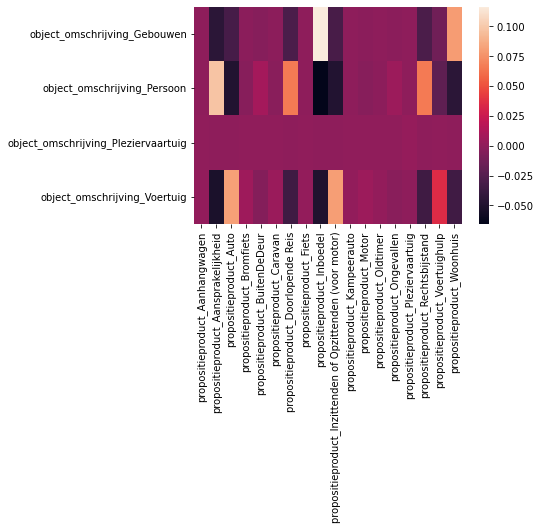

In [164]:
# filter for X axis variable
proposition = covariance_df.filter(regex='propositieproduct_').columns

# filter for Y axis variable
obj_description = covariance_df.filter(regex='object_omschrijving_').columns

#select columns using `.loc[]` and plot heatmap
sns.heatmap(covariance_df.loc[proposition, obj_description].T)


# <b>Part 4</b> : Extendability with pandas

#### <i>Contents</i>
>4.1 Using other libraries with pandas (Case study : Geopandas)  
>4.2 Writing clean & readable code  
>4.3 Extending Functionality (Tracking state changes and speeding up code)  

### <b>4.1</b>: Using other libraries

#### These are a few of the libraries often used alongside pandas.


#### Data preprocessing
- [Numpy](https://numpy.org/)
- [SciPy](https://scipy.org/)

#### Data Visualization
- [Geopandas](https://geopandas.org/en/stable/)
- [Matplotlib](https://matplotlib.org/)
- [Seaborn](https://seaborn.pydata.org/)
- [Bokeh](https://bokeh.org/)

#### Machine learning
- [Sklearn](https://scikit-learn.org/stable/index.html)
- [TensorFlow](https://www.tensorflow.org/)
- [Pytorch](https://pytorch.org/)
- [Apache spark](https://medium.com/towards-data-science/how-to-train-your-neural-networks-in-parallel-with-keras-and-apache-spark-ea8a3f48cae6)

### <b>4.11</b> :Geopandas

Geopandas is an example of a library that has adopted alot of the `pandas` syntax for dealing with data. 

In [165]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [166]:
gpd.__version__

'0.11.1'


You will find many of the familiar dataframe methods. The new thing here is that it supports geospatial data structures,   
as well a performing logical and arithmatic operations on them. To do this, you will need two things.

1. Some sort of geospatial marker per observations (e.g. zipcodes, or Latitude & Longitude data)
2. A [shapefile](https://desktop.arcgis.com/en/arcmap/10.3/manage-data/shapefiles/what-is-a-shapefile.htm)

Shapefiles contain geometric location and attribute information of geographic features, often made available by local or regional authorities of your area of interest.

<AxesSubplot:>

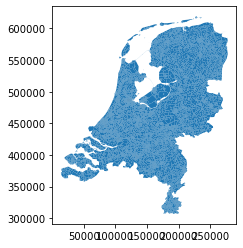

In [167]:
shape_path = "C:/Users/npurk/Documents/Interpolis/code/shapefiles/buurt_2021_v1.shp"

nl_shape = gpd.read_file(shape_path)[['geometry',
                                    'POSTCODE',
                                    'GM_CODE']].dropna()
nl_shape.plot()


- Geopandas DataFrames store the geometric and location information using Polygon type objects, in a GeoSeries named `geometry`.

In [168]:
type(nl_shape.geometry)

geopandas.geoseries.GeoSeries

- Below are some examples of arithmetic and logical operations you can do on the `geometry` column of a `geopandas` DataFrame. 

In [169]:
#type(nl_shape.geometry.iloc[0])
# nl_shape.geometry.iloc[0]+nl_shape.geometry.iloc[1]
#nl_shape.geometry.iloc[0:5].boundary.plot()
#nl_shape.geometry.iloc[0:5].unary_union

- Grouping data by the first `n` digits of postal codes, we can aggregate different `Polygon` and `Multigon` objects, to reveal the geospatial heirarchies in the Netherlands.

- This is achieved here using the `unary_union` on a set of grouped Polygons 

<AxesSubplot:>

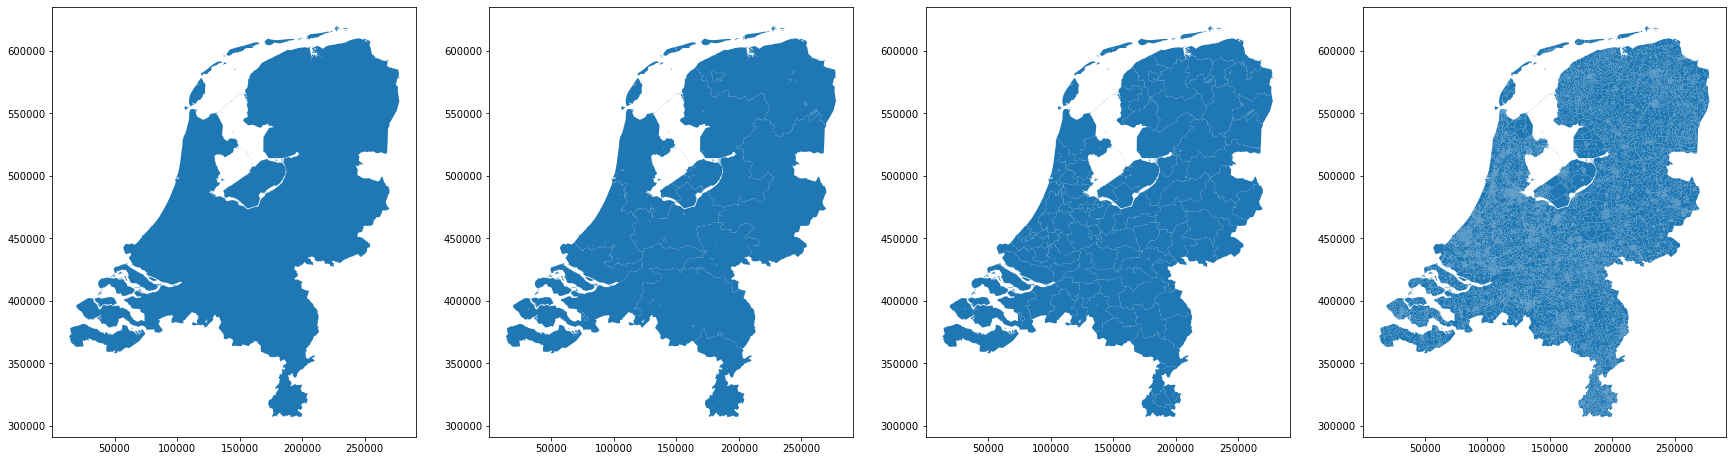

In [170]:

fig, ax = plt.subplots( 1,4 ,figsize = (30,24))

for i in range(0, 3):
    pc= nl_shape.assign(PC = nl_shape['POSTCODE'].apply(lambda x:x[:i]))
    pc.groupby('PC').agg({'geometry': lambda x: x.unary_union}).plot(ax=ax[i])
nl_shape.plot(ax=ax[3])



In [171]:
severe_claims

,TOTAL_VAL
PC4,
4261,612.047818
5658,612.021039
4731,611.666882
7038,611.401216
4824,611.069710


In [172]:
pc= (nl_shape
.assign(PC = nl_shape['POSTCODE'].apply(lambda x:x[:4]))
.groupby('PC')
.agg({'geometry': lambda x: x.unary_union})
)

- We can naturally merge this GeoPandas dataframe with a normal pandas DataFrame, using the zipcodes as a common index

In [173]:
merge_df = pd.merge(severe_claims, pc, left_index=True, right_index=True)
merge_df = gpd.GeoDataFrame(merge_df.assign(centroid =merge_df.geometry.values.centroid ))
merge_df.head()

,TOTAL_VAL,geometry,centroid
4261,612.047818,"POLYGON ((134088.377 420163.335, 134127.414 42...",POINT (135081.161 418863.984)
5658,612.021039,"POLYGON ((157725.307 383436.923, 157720.206 38...",POINT (156617.610 383414.656)
4731,611.666882,"POLYGON ((98118.070 400129.312, 98239.211 4000...",POINT (95933.727 400456.200)
7038,611.401216,"POLYGON ((215801.203 435675.813, 215647.094 43...",POINT (215284.400 435422.889)
4824,611.069710,"POLYGON ((109762.777 401712.442, 109763.508 40...",POINT (110983.155 402059.421)


- After such a merge, we may plot observations of interest, as shown below

<AxesSubplot:>

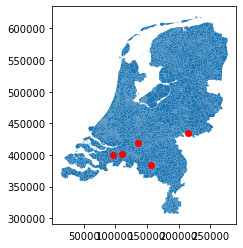

In [174]:
fig, ax=plt.subplots()
pc.plot(ax=ax)
merge_df.centroid.plot(ax=ax, color='red')


### <b>4.2</b>: Mantaining clean and readable code

#### Debugging while chaining

- Chaining might be daunting because you are worried about not seeing the intermediate states of dataframes between different `.pipe()` calls.

- There are ways around this

In [175]:

def encode_family_composition(df):

    return df.replace({  'Onbekend':0,
                        'Eenpersoons huishouden':1,
                        'Tweepersoons huishouden':2,
                        'Meerpersoons huishouden':3})

def drop_columns(df, cols):
    return df.drop(cols, axis=1)


def format_date(df, col):
    df[col] = pd.to_datetime(df[col])
    return df


def compute_lifetime_premium(df):
    return df.assign(lifetime_premium = 
                                        df.jaarpremie_verzekeraar
                                    * (   pd.to_datetime('now', utc=True).year
                                        - df.ingangsdatum_polis.dt.year)
                                       )

In [176]:
(policies
.pipe(encode_family_composition)
.pipe(drop_columns, ['peildatum_ingevoerd'])
.pipe(format_date, 'ingangsdatum_polis')
.pipe(compute_lifetime_premium))

,begindatum,einddatum,peildatum,peildatum_volgnummer,gezinssamenstelling,distributiekanaal,leeftijd_polishouder,verkoopdatum_polis,ingangsdatum_polis,eerstvolgende_prolongatiedatum,...,preventiekorting_jaarbedrag,assurantiebel_jaarbedrag,preventiekorting_indicatie,rubriek_onbekend_premie,rubriekkorting_percentage,polisstatus_berek_peildatum,Polisnummer_hash,polis_id,postcode4,lifetime_premium
0,2021-01-01,31DEC9999,2021-01-01,3,2,2,51.0,NaN,2001-04-12,12APR2021,...,0.0,2.74,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851.0,1582.56
1,1999-01-01,01JAN2020,2019-01-01,1,2,2,49.0,NaN,2001-04-12,12APR2019,...,0.0,1.77,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851.0,1582.56
2,2020-01-01,01JAN2021,2020-01-01,2,2,2,50.0,NaN,2001-04-12,12APR2020,...,0.0,1.77,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851.0,1582.56
3,2020-01-01,01JAN2021,2020-01-01,2,1,2,65.0,NaN,1997-02-24,26APR2020,...,0.0,199.89,0,NaN,9,1,0000942B3DC5E9AEDBACCA3B0357D98DC0A4F583F93BBF...,2,4451.0,19473.00
4,1999-01-01,01JAN2020,2019-01-01,1,1,2,64.0,NaN,1997-02-24,26APR2019,...,0.0,175.58,0,NaN,9,1,0000942B3DC5E9AEDBACCA3B0357D98DC0A4F583F93BBF...,2,4451.0,17253.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358400,2021-01-01,31DEC9999,2021-01-01,3,3,2,71.0,NaN,1997-02-24,25MAY2021,...,0.0,62.28,0,NaN,3,1,FFFF88B3A47A382FF32CBD5C198CE7FA1A520600F8F44C...,131584,1722,5661.00
358401,2021-01-01,31DEC9999,2021-01-01,3,1,2,91.0,NaN,2005-07-20,20JUL2021,...,0.0,21.35,0,NaN,3,1,FFFF9B84025AD9BF78D6B4A617CA251EE5422CFAF77F57...,131585,4286,1296.25
358402,1999-01-01,01JAN2020,2019-01-01,1,1,2,88.0,NaN,2005-07-20,20JUL2019,...,0.0,21.35,0,NaN,3,1,FFFF9B84025AD9BF78D6B4A617CA251EE5422CFAF77F57...,131585,4286,1296.76
358403,2020-01-01,01JAN2021,2020-01-01,2,1,2,89.0,NaN,2005-07-20,20JUL2020,...,0.0,21.68,0,NaN,3,1,FFFF9B84025AD9BF78D6B4A617CA251EE5422CFAF77F57...,131585,4286,1316.31


#### <b>Method 1 </b>:
- You can `.pipe` the <i>Ipython</u> `display` function, to render an intermediate dataframe

In [177]:
return_df = (policies
.pipe(encode_family_composition)
.pipe(drop_columns, ['peildatum_ingevoerd'])
.pipe(format_date, 'ingangsdatum_polis')
#.pipe(lambda df:display(df) or df)
.pipe(compute_lifetime_premium))

#### <b>Method 2 </b>:
You could assign an intermediate dataframe to a global variable and inspect it later

In [178]:
def get_intermediate_df(df, name):
    globals()[name]=df
    return df

In [179]:
(policies
.pipe(encode_family_composition)
.pipe(drop_columns, ['peildatum_ingevoerd'])
.pipe(format_date, 'ingangsdatum_polis')
.pipe(get_intermediate_df, 'date_formatted')
.pipe(compute_lifetime_premium))

,begindatum,einddatum,peildatum,peildatum_volgnummer,gezinssamenstelling,distributiekanaal,leeftijd_polishouder,verkoopdatum_polis,ingangsdatum_polis,eerstvolgende_prolongatiedatum,...,preventiekorting_jaarbedrag,assurantiebel_jaarbedrag,preventiekorting_indicatie,rubriek_onbekend_premie,rubriekkorting_percentage,polisstatus_berek_peildatum,Polisnummer_hash,polis_id,postcode4,lifetime_premium
0,2021-01-01,31DEC9999,2021-01-01,3,2,2,51.0,NaN,2001-04-12,12APR2021,...,0.0,2.74,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851.0,1582.56
1,1999-01-01,01JAN2020,2019-01-01,1,2,2,49.0,NaN,2001-04-12,12APR2019,...,0.0,1.77,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851.0,1582.56
2,2020-01-01,01JAN2021,2020-01-01,2,2,2,50.0,NaN,2001-04-12,12APR2020,...,0.0,1.77,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851.0,1582.56
3,2020-01-01,01JAN2021,2020-01-01,2,1,2,65.0,NaN,1997-02-24,26APR2020,...,0.0,199.89,0,NaN,9,1,0000942B3DC5E9AEDBACCA3B0357D98DC0A4F583F93BBF...,2,4451.0,19473.00
4,1999-01-01,01JAN2020,2019-01-01,1,1,2,64.0,NaN,1997-02-24,26APR2019,...,0.0,175.58,0,NaN,9,1,0000942B3DC5E9AEDBACCA3B0357D98DC0A4F583F93BBF...,2,4451.0,17253.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358400,2021-01-01,31DEC9999,2021-01-01,3,3,2,71.0,NaN,1997-02-24,25MAY2021,...,0.0,62.28,0,NaN,3,1,FFFF88B3A47A382FF32CBD5C198CE7FA1A520600F8F44C...,131584,1722,5661.00
358401,2021-01-01,31DEC9999,2021-01-01,3,1,2,91.0,NaN,2005-07-20,20JUL2021,...,0.0,21.35,0,NaN,3,1,FFFF9B84025AD9BF78D6B4A617CA251EE5422CFAF77F57...,131585,4286,1296.25
358402,1999-01-01,01JAN2020,2019-01-01,1,1,2,88.0,NaN,2005-07-20,20JUL2019,...,0.0,21.35,0,NaN,3,1,FFFF9B84025AD9BF78D6B4A617CA251EE5422CFAF77F57...,131585,4286,1296.76
358403,2020-01-01,01JAN2021,2020-01-01,2,1,2,89.0,NaN,2005-07-20,20JUL2020,...,0.0,21.68,0,NaN,3,1,FFFF9B84025AD9BF78D6B4A617CA251EE5422CFAF77F57...,131585,4286,1316.31


In [180]:
date_formatted.head()

,begindatum,einddatum,peildatum,peildatum_volgnummer,gezinssamenstelling,distributiekanaal,leeftijd_polishouder,verkoopdatum_polis,ingangsdatum_polis,eerstvolgende_prolongatiedatum,...,loyaliteitskorting_jaarbedrag,preventiekorting_jaarbedrag,assurantiebel_jaarbedrag,preventiekorting_indicatie,rubriek_onbekend_premie,rubriekkorting_percentage,polisstatus_berek_peildatum,Polisnummer_hash,polis_id,postcode4
0,2021-01-01,31DEC9999,2021-01-01,3,2,2,51.0,NaN,2001-04-12,12APR2021,...,0.0,0.0,2.74,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851.0
1,1999-01-01,01JAN2020,2019-01-01,1,2,2,49.0,NaN,2001-04-12,12APR2019,...,0.0,0.0,1.77,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851.0
2,2020-01-01,01JAN2021,2020-01-01,2,2,2,50.0,NaN,2001-04-12,12APR2020,...,0.0,0.0,1.77,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851.0
3,2020-01-01,01JAN2021,2020-01-01,2,1,2,65.0,NaN,1997-02-24,26APR2020,...,0.0,0.0,199.89,0,NaN,9,1,0000942B3DC5E9AEDBACCA3B0357D98DC0A4F583F93BBF...,2,4451.0
4,1999-01-01,01JAN2020,2019-01-01,1,1,2,64.0,NaN,1997-02-24,26APR2019,...,0.0,0.0,175.58,0,NaN,9,1,0000942B3DC5E9AEDBACCA3B0357D98DC0A4F583F93BBF...,2,4451.0


#### <b>Method 3 </b>:
You could write custom python [decorators](https://www.geeksforgeeks.org/decorators-in-python/), that let you track state changes for any given function.

In [181]:
policies.pipe(drop_columns, 'assurantiebel_jaarbedrag')

,begindatum,einddatum,peildatum,peildatum_volgnummer,peildatum_ingevoerd,gezinssamenstelling,distributiekanaal,leeftijd_polishouder,verkoopdatum_polis,ingangsdatum_polis,...,betaaltermijnkorting_jaarbedrag,loyaliteitskorting_jaarbedrag,preventiekorting_jaarbedrag,preventiekorting_indicatie,rubriek_onbekend_premie,rubriekkorting_percentage,polisstatus_berek_peildatum,Polisnummer_hash,polis_id,postcode4
0,2021-01-01,31DEC9999,2021-01-01,3,01JAN2021,Tweepersoons huishouden,2,51.0,NaN,12APR2001,...,-0.76,0.0,0.0,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851.0
1,1999-01-01,01JAN2020,2019-01-01,1,01JAN2019,Tweepersoons huishouden,2,49.0,NaN,12APR2001,...,-0.76,0.0,0.0,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851.0
2,2020-01-01,01JAN2021,2020-01-01,2,01JAN2020,Tweepersoons huishouden,2,50.0,NaN,12APR2001,...,-0.76,0.0,0.0,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851.0
3,2020-01-01,01JAN2021,2020-01-01,2,01JAN2020,Eenpersoons huishouden,2,65.0,NaN,24FEB1997,...,-7.86,0.0,0.0,0,NaN,9,1,0000942B3DC5E9AEDBACCA3B0357D98DC0A4F583F93BBF...,2,4451.0
4,1999-01-01,01JAN2020,2019-01-01,1,01JAN2019,Eenpersoons huishouden,2,64.0,NaN,24FEB1997,...,-6.95,0.0,0.0,0,NaN,9,1,0000942B3DC5E9AEDBACCA3B0357D98DC0A4F583F93BBF...,2,4451.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358400,2021-01-01,31DEC9999,2021-01-01,3,01JAN2021,Meerpersoons huishouden,2,71.0,NaN,24FEB1997,...,0.00,0.0,0.0,0,NaN,3,1,FFFF88B3A47A382FF32CBD5C198CE7FA1A520600F8F44C...,131584,1722
358401,2021-01-01,31DEC9999,2021-01-01,3,01JAN2021,Eenpersoons huishouden,2,91.0,NaN,20JUL2005,...,-0.76,0.0,0.0,0,NaN,3,1,FFFF9B84025AD9BF78D6B4A617CA251EE5422CFAF77F57...,131585,4286
358402,1999-01-01,01JAN2020,2019-01-01,1,01JAN2019,Eenpersoons huishouden,2,88.0,NaN,20JUL2005,...,-0.76,0.0,0.0,0,NaN,3,1,FFFF9B84025AD9BF78D6B4A617CA251EE5422CFAF77F57...,131585,4286
358403,2020-01-01,01JAN2021,2020-01-01,2,01JAN2020,Eenpersoons huishouden,2,89.0,NaN,20JUL2005,...,-0.78,0.0,0.0,0,NaN,3,1,FFFF9B84025AD9BF78D6B4A617CA251EE5422CFAF77F57...,131585,4286


- This decorator lets you track changes in the shape of a dataframe, before and after a `.pipe()` call.
- It also prints out the name of the function its decorating. 
- Hence you can use the same decorator on multiple functions simultaneously and easily follow how you dataset shape changes throughout each step of the way.

In [182]:
def shape_tracker(func):
    def wrapper(*args, **kwargs):
        print('Executing : ', func.__name__)
        df = args[0]
        print('Shape before : ', df.shape)
        new_df = func(*args, **kwargs)
        print('Shape after : ', new_df.shape)
        return new_df
    return wrapper


In [183]:
@shape_tracker
def drop_columns(df, cols):
    return df.drop(cols, axis=1)

In [184]:
policies.pipe(drop_columns, 'assurantiebel_jaarbedrag')

Executing :  drop_columns
Shape before :  (358405, 90)
Shape after :  (358405, 89)


,begindatum,einddatum,peildatum,peildatum_volgnummer,peildatum_ingevoerd,gezinssamenstelling,distributiekanaal,leeftijd_polishouder,verkoopdatum_polis,ingangsdatum_polis,...,betaaltermijnkorting_jaarbedrag,loyaliteitskorting_jaarbedrag,preventiekorting_jaarbedrag,preventiekorting_indicatie,rubriek_onbekend_premie,rubriekkorting_percentage,polisstatus_berek_peildatum,Polisnummer_hash,polis_id,postcode4
0,2021-01-01,31DEC9999,2021-01-01,3,01JAN2021,Tweepersoons huishouden,2,51.0,NaN,12APR2001,...,-0.76,0.0,0.0,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851.0
1,1999-01-01,01JAN2020,2019-01-01,1,01JAN2019,Tweepersoons huishouden,2,49.0,NaN,12APR2001,...,-0.76,0.0,0.0,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851.0
2,2020-01-01,01JAN2021,2020-01-01,2,01JAN2020,Tweepersoons huishouden,2,50.0,NaN,12APR2001,...,-0.76,0.0,0.0,0,NaN,0,1,00001961C12713C57BFDCF703B10F4C581DC5C1451EACA...,1,6851.0
3,2020-01-01,01JAN2021,2020-01-01,2,01JAN2020,Eenpersoons huishouden,2,65.0,NaN,24FEB1997,...,-7.86,0.0,0.0,0,NaN,9,1,0000942B3DC5E9AEDBACCA3B0357D98DC0A4F583F93BBF...,2,4451.0
4,1999-01-01,01JAN2020,2019-01-01,1,01JAN2019,Eenpersoons huishouden,2,64.0,NaN,24FEB1997,...,-6.95,0.0,0.0,0,NaN,9,1,0000942B3DC5E9AEDBACCA3B0357D98DC0A4F583F93BBF...,2,4451.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358400,2021-01-01,31DEC9999,2021-01-01,3,01JAN2021,Meerpersoons huishouden,2,71.0,NaN,24FEB1997,...,0.00,0.0,0.0,0,NaN,3,1,FFFF88B3A47A382FF32CBD5C198CE7FA1A520600F8F44C...,131584,1722
358401,2021-01-01,31DEC9999,2021-01-01,3,01JAN2021,Eenpersoons huishouden,2,91.0,NaN,20JUL2005,...,-0.76,0.0,0.0,0,NaN,3,1,FFFF9B84025AD9BF78D6B4A617CA251EE5422CFAF77F57...,131585,4286
358402,1999-01-01,01JAN2020,2019-01-01,1,01JAN2019,Eenpersoons huishouden,2,88.0,NaN,20JUL2005,...,-0.76,0.0,0.0,0,NaN,3,1,FFFF9B84025AD9BF78D6B4A617CA251EE5422CFAF77F57...,131585,4286
358403,2020-01-01,01JAN2021,2020-01-01,2,01JAN2020,Eenpersoons huishouden,2,89.0,NaN,20JUL2005,...,-0.78,0.0,0.0,0,NaN,3,1,FFFF9B84025AD9BF78D6B4A617CA251EE5422CFAF77F57...,131585,4286


### <b>4.3</b>: Speeding up computation 
- numba
- cython

In [185]:
claims.head()

,DATE_INIT,sub_claim_nr,claim_metatype,reason_closed,cause_damage,claim_type,insurance_product,type_damage,NA_ND1,contact_channel,...,claim_status_description,insurance_product_d,claim_metatype_d,TOTAL_VAL,NET_PAID,INTERNAL_VAL,policy_hash,polis_id,claim_id,PC4
0,07JUN2021:04:02:27.0860000,1,ZC,ZA,ZG05,ZC01,ZC10,X60,NaN,CP,...,Gesloten,Bez. Buitenshuis Doorl.,Reis/Tijdelijke Reis&BDD,136.50,136.50,136.50,FE90B03B36DFB9CA6493941BF17DF3D0EA4B649BDE03B2...,130828,1,7419
1,07JUN2021:04:02:27.0860000,1,ZD,ZA,ZD01,ZD01,ZD01,Y32,NaN,PH,...,Gesloten,AVP Materieel,Aansprakelijkheid,450.00,450.00,450.00,61CACB9EE9086AB21C81C2B20E23E5817CDCA84C68A7D4...,50161,2,6371
2,07JUN2021:04:02:27.0860000,1,NaN,ZA,ZA01,ZAT1,ZA01,Z23,NaN,PH,...,Gesloten,Aanrijding,NaN,626.91,626.91,626.91,396B1B78B6DA8829C16A6527B89626A604FBB3538FBB71...,29326,3,5801
3,07JUN2021:04:02:27.0860000,1,ZC,ZK,ZG05,ZC01,ZC10,X59,NaN,PH,...,Gesloten,Bez. Buitenshuis Doorl.,Reis/Tijdelijke Reis&BDD,0.00,0.00,0.00,A8B0BD1967723A6732281C365E8603C38680D76DCA433B...,86663,4,5737
4,07JUN2021:04:02:27.0860000,1,ZB,ZA,ZB01,ZB01,ZB01,Z68,NaN,PH,...,Gesloten,Woonhuis Standaard,Wonen / Brand,463.35,463.35,463.35,B55EAB5B7948C52D47C6169CA8A49343890C7AED3CEB4A...,93279,5,8921


- Heres some standard numerical computation you might want to do on your data

In [186]:
def compute_lifetime_premium(premium, now_year, signup_year):
    return premium*(now_year-signup_year)

- We take a sample of the original dataset for benchmarking

In [187]:
pol = policies.sample(100000).pipe(format_date, 'ingangsdatum_polis')

pol = pol.assign(signup_year =  pol.ingangsdatum_polis.dt.year)

pol = pol.astype({'signup_year':'int', 'jaarpremie_verzekeraar':'float'})

- Below, we apply our pure python function element wise to two columns of the dataframe. 

In [188]:
%timeit pol.apply(lambda x: compute_lifetime_premium(x.jaarpremie_verzekeraar, 2022, x.signup_year), axis=1)

2.54 s ± 127 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Lets see two ways we could achieve better results. 

### <b>Method 1</b> :Extending code with [Cython]((https://cython.org/))

We will define the same function as above, but we will make some changes to it using a language called `Cython`. You can think of `Cython` as an <i>umbrella language</i> for python, which supports converting python and python-<i>like</i> code into efficient C code, compiling it ahead of time.

- To do this, we use a magic command, `load_ext`, used to load in the Cython [extension](https://ipython.readthedocs.io/en/stable/config/extensions/index.html?highlight=cython#extensions-bundled-with-ipython) for python. 
- This will let us use another magic command, `%%cython`, to write `Cython` code in the Jupyter notebook itself.

<b>NOTE</b>: In Jupyter, the single `%` symbol is used when you want a magic command applied on a single line, while the double `%%` symbols are used when you want it applied to the contents of the entire cell. 

In [189]:
%load_ext Cython

Next, we tell Jupyter to <i>Cythonize</i> the function in the cell below, write it to a `.pyx` file, and make it available in this notebook as a python object.

- As you can see below,  the magic command must be placed at the top of any function we are trying to <i>Cythonize</i>. 

In [190]:
%%cython
cimport numpy as np
import numpy as np
cpdef np.ndarray[double] compute_lifetime_premiums_c( np.ndarray[double] premium,
                                                      np.ndarray[np.int32_t]  signup_year):
    return premium*(2022-signup_year)

##### Lets look at the function above: 

- Instead of `def`, the usual keyword for defining python functions, we use `cpdef`, which is one of the [Cython supported ways](https://notes-on-cython.readthedocs.io/en/latest/function_declarations.html) of declaring a function.

- We imported the packages we want to be included in our cython code, like the C version of numpy. This lets us define recognized C data types in our code 

-  We then enforce some typing information on the function parameters and its return value. 

#### The result:

In [191]:
%timeit compute_lifetime_premiums_c(pol.jaarpremie_verzekeraar.values,  pol.signup_year.values)

160 µs ± 2.2 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### <b>Method 2</b> :Extending code with [Numba](https://numba.pydata.org/)

You might want to go down this route specially when dealing with purely numeric computations.  

Not only is it easier to read, but it lets you take a normal python function and optimize it at runtime, to get next-to C and FORTRAN level speeds. One main conceptual difference from `cython` here is that `Numba` is leveraging <i>just-in-time</i> compilation where as the first approach compiles <i>ahead-of-time</i>.

In [192]:
import numba
@numba.njit
def compute_lifetime_premium_n(premium, signup_year):
    return premium*(2022-signup_year)

@numba.njit(cache=True)
def compute_lifetime_premiums_numba( premiums,   signup_year):
    res = np.empty(len(premiums))
    for i in range(len(res)):
        res[i] = compute_lifetime_premium_n(premiums[i],   signup_year[i])
    return res


##### Lets look at the function above itself. 
<b>NOTE</b>: All we did here is add the `@numba.njit` decorator to each function. 

* The first function operates on <i>elements</i> of two `numpy arrays` (i.e. a float called `premium` and an integer named `signup_year`)

* The second one loops over two entire arrays, applying the first function element-wise.

#### The result:

In [193]:
%timeit compute_lifetime_premiums_numba(pol.jaarpremie_verzekeraar.to_numpy(),pol.signup_year.to_numpy())

95.8 µs ± 4.17 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


When Numba code is called for the first time, it compiles function parameters and return types into faster machine code.  
Thus, the first call to a `numba.jit` decorated function may take a tad longer, as it includes compilation time.  

Future calls to the function should execute faster, since `Numba` will cache the machine code corresponding  
 to your `@njit` decorated function, after the first time it has been called.

#### 

## In Summary:
 - Always chain
 - Write readable code
 - Extend where/when you can
 - Enjoy the journey!

# Thank You for your attention!